# Analyzing Social Media Engagement Capstone Project

<a id='table_of_contents'></a>

0. [Introduction](#Introduction)<br>
      0.1. [Import libraries](#imports)<br>
      0.2. [Import Data](#import_data)<br>
1. [Data Exploration](#DataExploration)
2. [Data Cleaning](#Data-Cleaning)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Feature engineering](#feature_engineering)
5. [Model training](#Model-Training)<br>
      5.1. [Linear Regression](#linear_regression)<br>
      5.2. [Random Forest](#random_forest)<br>
      5.3. [XG Boost](#XG_boost)<br>
      5.4. .[RidgeCV](#RidgeCV)<br>
      5.4. [Comparing algorithm performances](#comparing_algorithm_performances)
6. [Cross Validation](#Cross_Validation)<br>

## 0. Introduction

This project conducts an analysis of social media engagement call data from Kaggle https://www.kaggle.com/datasets/aliredaelblgihy/social-media-engagement-report?select=social_media_engagement_data.xlsx. The data contains the following fields:
Platform,Post ID,Post Content,Weekday Type,Time Periods :-  object 

Post Timestamp,Date,Time     :-datetime64[ns]

Likes,Comments,Shares,Impressions,Reach,Audience Age :-int64

Engagement Rate              float64

Age Group,Audience Gender,Audience Location,
Audience Continent,Audience Interests,Sentiment :-object

Ad Budget                      int64
Cost per Ad                  float64
ROI                          float64

Project Objective:-
This project analyzes social media engagement metrics across different platforms to identify key trends in user interactions, post-performance, and ad efficiency.

Predicting Variable :- Engagement Rate w.r.t all above aspects.

## 0.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
import plotly.express as px
%matplotlib inline

## 0.2 Import Data

In [2]:
Social_media_df = pd.read_excel("C:/Users/Sameera/Desktop/Social-Media-Engagement-Analysis/data/social_media_engagement_data_1_capstone/social_media_engagement_data_1.xlsx" ,sheet_name ='Working File')

In [3]:
print(Social_media_df.shape)
Social_media_df.head()

(100000, 27)


Platform                               Post ID Post Type  \
0  Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
1   Facebook  a30c948b-0fb3-4e92-95da-e2dea184f568      Link   
2    Twitter  aee74d06-c775-459c-8fc4-013ce25644f1     Image   
3  Instagram  80415748-a509-4fc6-8b55-74f2babe5dac     Image   
4   LinkedIn  14d34185-639a-4508-a8b6-02a743fe0dbc      Link   

                                       Post Content          Post Timestamp  \
0                      Increase fast partner south. 2023-07-30 06:40:06.356   
1           Floor glass bring indicate seem detail. 2022-06-19 14:15:59.833   
2  Customer stop language everybody rest chance me. 2022-06-04 06:19:50.403   
3                     Town find identify game your. 2022-05-12 15:41:21.902   
4                            Seem strategy you cup. 2023-10-26 20:53:33.135   

        Date Weekday Type                    Time Time Periods Likes  ...  \
0 2023-07-30      Weekend 2023-07-30 06:40:06.356      Morning   908  ...   
1 2022-06-19      Weekend 2022-06-19 14:15:59.833    Afternoon   604  ...   
2 2022-06-04      Weekend 2022-06-04 06:19:50.403      Morning   288  ...   
3 2022-05-12      Weekday 2022-05-12 15:41:21.902    Afternoon   870  ...   
4 2023-10-26      Weekday 2023-10-26 20:53:33.135      Evening   573  ...   

   Audience Gender                 Audience Location  Audience Continent  \
0             Male                            Greece              Europe   
1           Female  Lao People's Democratic Republic                Asia   
2            Other                            Jordan                Asia   
3             Male                             Sudan              Africa   
4             Male                             Gabon              Africa   

   Audience Interests                           Campaign ID  Sentiment  \
0          population                                   NaN    Neutral   
1            attorney  98705a1e-2573-4cb8-983b-2112d4b140c9      Mixed   
2              affect                                   NaN   Positive   
3               money  6b15bf9b-14cc-4ab9-9168-56322057b61e   Positive   
4                part                                   NaN   Negative   

  Influencer ID Ad Budget Cost per Ad         ROI  
0           NaN      1570  112.142857  -27.388109  
1           NaN      4750  431.818182 -177.291320  
2           NaN      4034  310.307692  105.967069  
3           NaN      3682  306.833333  -66.047289  
4           NaN       192   13.714286   21.125003  

[5 rows x 27 columns]

## 1. Data Exploration

In [4]:
Social_media_df.columns

Index(['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp',
       'Date', 'Weekday Type', 'Time', 'Time Periods', 'Likes', 'Comments',
       'Shares', 'Impressions', 'Reach', 'Engagement Rate', 'Audience Age',
       'Age Group', 'Audience Gender', 'Audience Location',
       'Audience Continent', 'Audience Interests', 'Campaign ID', 'Sentiment',
       'Influencer ID', 'Ad Budget', 'Cost per Ad', 'ROI'],
      dtype='object')

In [5]:
Social_media_df.dtypes

Platform                      object
Post ID                       object
Post Type                     object
Post Content                  object
Post Timestamp        datetime64[ns]
Date                  datetime64[ns]
Weekday Type                  object
Time                  datetime64[ns]
Time Periods                  object
Likes                         object
Comments                       int64
Shares                         int64
Impressions                    int64
Reach                          int64
Engagement Rate              float64
Audience Age                   int64
Age Group                     object
Audience Gender               object
Audience Location             object
Audience Continent            object
Audience Interests            object
Campaign ID                   object
Sentiment                     object
Influencer ID                 object
Ad Budget                      int64
Cost per Ad                  float64
ROI                          float64
d

In [6]:
Social_media_df['Likes'] = pd.to_numeric(Social_media_df['Likes'], errors='coerce')
Social_media_df['Likes'] = Social_media_df['Likes'].fillna(0).astype('int64')

In [7]:
Social_media_df.dtypes

Platform                      object
Post ID                       object
Post Type                     object
Post Content                  object
Post Timestamp        datetime64[ns]
Date                  datetime64[ns]
Weekday Type                  object
Time                  datetime64[ns]
Time Periods                  object
Likes                          int64
Comments                       int64
Shares                         int64
Impressions                    int64
Reach                          int64
Engagement Rate              float64
Audience Age                   int64
Age Group                     object
Audience Gender               object
Audience Location             object
Audience Continent            object
Audience Interests            object
Campaign ID                   object
Sentiment                     object
Influencer ID                 object
Ad Budget                      int64
Cost per Ad                  float64
ROI                          float64
d

In [8]:
def get_categorical_columns(dataset):

    
    categorical_columns = dataset.select_dtypes(include=['object', 'category'])
    unique_values_cat_cols=categorical_columns.apply(lambda x: x.unique())
    return unique_values_cat_cols
unique_values_count = get_categorical_columns(Social_media_df)
print(unique_values_count)

Platform                       [Instagram, Facebook, Twitter, LinkedIn]
Post ID               [16ce29c5-2dc7-478f-9814-a86754f3ce8b, a30c948...
Post Type                                          [Video, Link, Image]
Post Content          [Increase fast partner south., Floor glass bri...
Weekday Type                                         [Weekend, Weekday]
Time Periods                       [Morning, Afternoon, Evening, Night]
Age Group             [Senior Adults, Mature Adults, Adolescent Adults]
Audience Gender                                   [Male, Female, Other]
Audience Location     [Greece, Lao People's Democratic Republic, Jor...
Audience Continent    [Europe, Asia, Africa, NorthAmerica, Oceania, ...
Audience Interests    [population, attorney, affect, money, part, se...
Campaign ID           [nan, 98705a1e-2573-4cb8-983b-2112d4b140c9, 6b...
Sentiment                          [Neutral, Mixed, Positive, Negative]
Influencer ID         [nan, 020d4653-f752-4176-a694-21b10355604e

In [9]:
def get_numerical_columns(dataset):

    
    numerical_columns = dataset.select_dtypes(include=['number'])
    unique_values_num_cols=numerical_columns.apply(lambda x: x.unique())
    return unique_values_num_cols
unique_values_count = get_numerical_columns(Social_media_df)
print(unique_values_count)

Likes              [908, 604, 288, 870, 573, 430, 973, 137, 658, ...
Comments           [125, 29, 230, 92, 192, 223, 309, 327, 36, 476...
Shares             [85, 2, 56, 15, 19, 86, 164, 141, 128, 104, 98...
Impressions        [3884, 1831, 3927, 4829, 2797, 3265, 3917, 463...
Reach              [1223, 1386, 2516, 1377, 1949, 2813, 3404, 101...
Engagement Rate    [91.41455437448897, 45.81529581529581, 22.8139...
Audience Age       [48, 33, 23, 40, 34, 18, 47, 44, 31, 30, 42, 1...
Ad Budget          [1570, 4750, 4034, 3682, 192, 2469, 3685, 2275...
Cost per Ad        [112.142857142857, 431.818181818181, 310.30769...
ROI                [-27.3881089229114, -177.291319621225, 105.967...
dtype: object


## 2. Data Cleaning

In [10]:
pd.isna(Social_media_df).sum()

Platform                  0
Post ID                   0
Post Type                 0
Post Content              0
Post Timestamp            0
Date                      0
Weekday Type              0
Time                      0
Time Periods              0
Likes                     0
Comments                  0
Shares                    0
Impressions               0
Reach                     0
Engagement Rate           0
Audience Age              0
Age Group                 0
Audience Gender           0
Audience Location         0
Audience Continent        0
Audience Interests        0
Campaign ID           79868
Sentiment                 0
Influencer ID         90006
Ad Budget                 0
Cost per Ad               0
ROI                       0
dtype: int64

<AxesSubplot:>

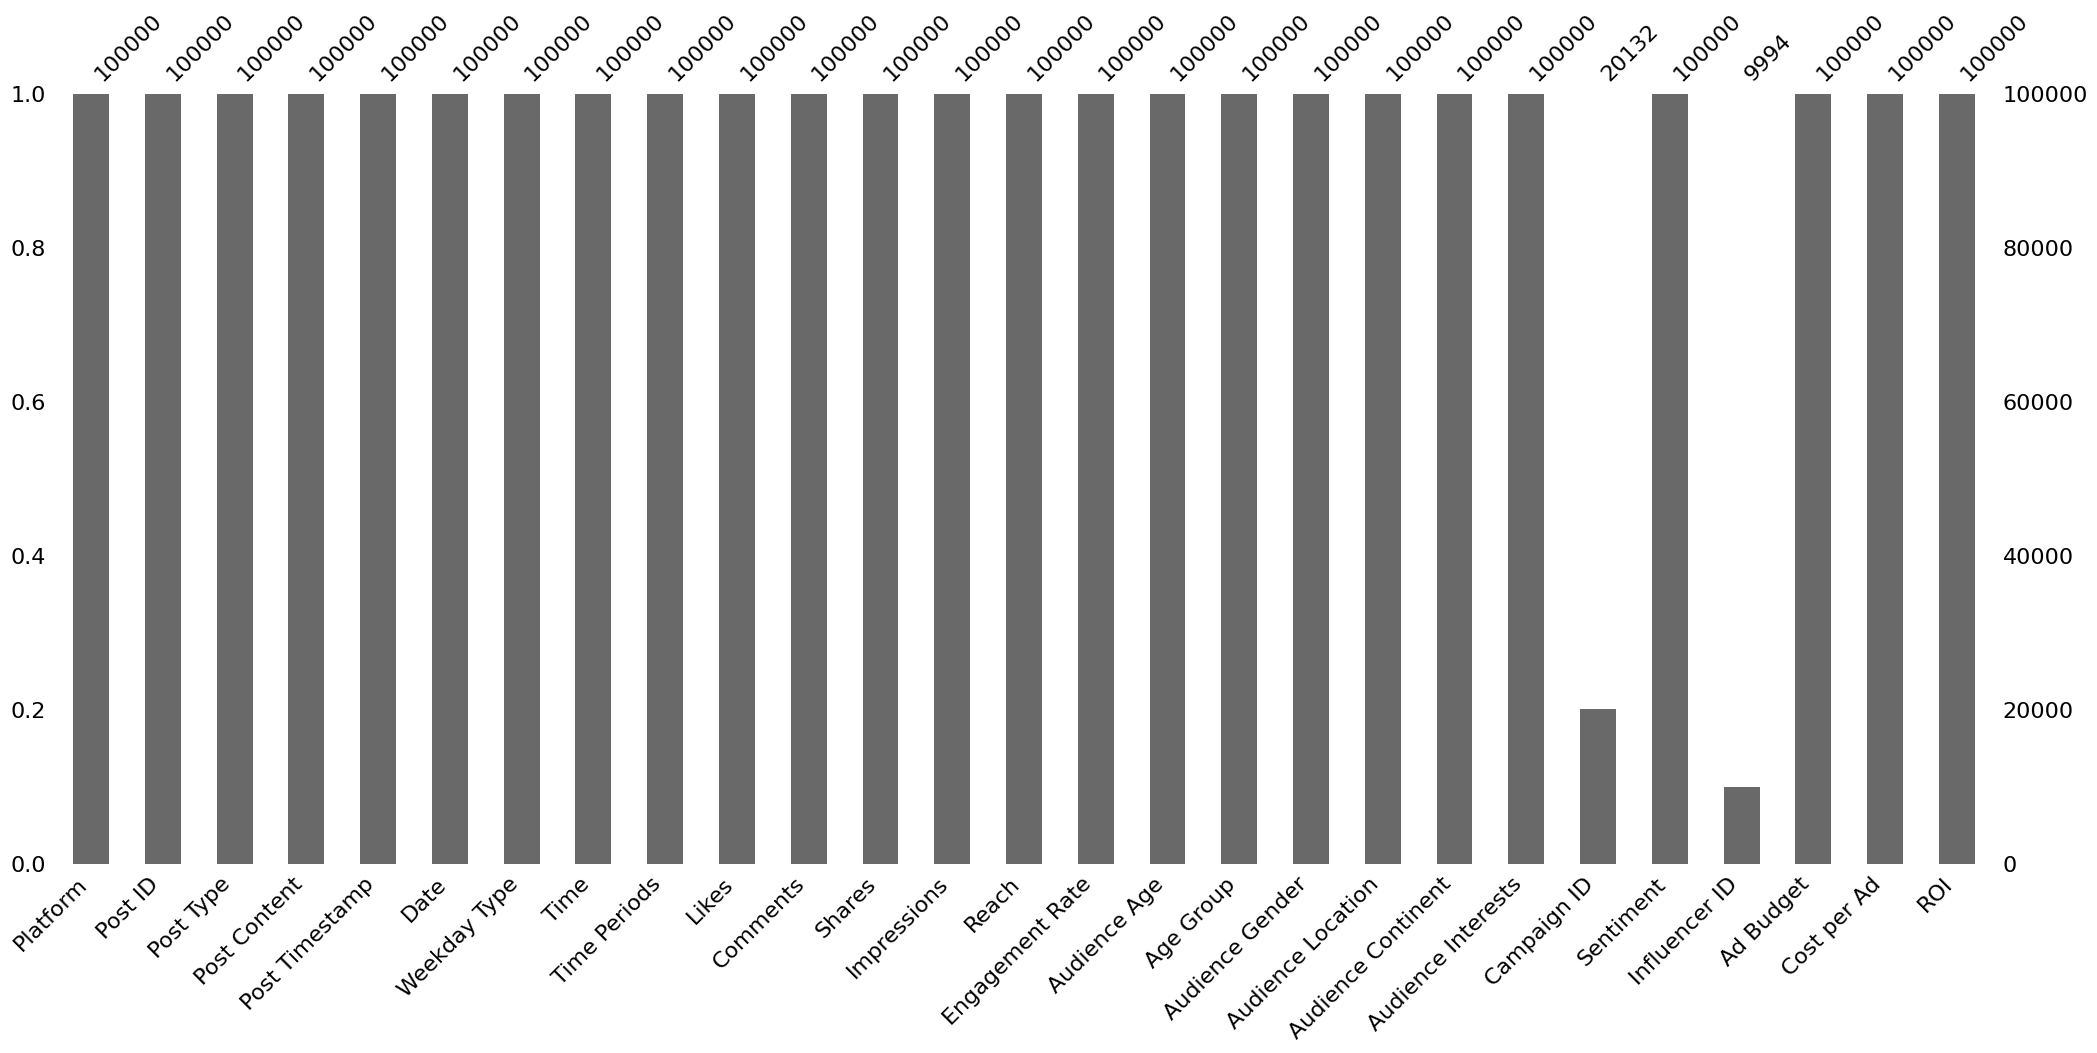

In [11]:
msno.bar(Social_media_df)

In [12]:
# Remove the columns "Campaign ID" and "Influencer ID"
df_cleaned = Social_media_df.drop(columns=["Campaign ID", "Influencer ID"], errors="ignore")
print(df_cleaned.head())

    Platform                               Post ID Post Type  \
0  Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
1   Facebook  a30c948b-0fb3-4e92-95da-e2dea184f568      Link   
2    Twitter  aee74d06-c775-459c-8fc4-013ce25644f1     Image   
3  Instagram  80415748-a509-4fc6-8b55-74f2babe5dac     Image   
4   LinkedIn  14d34185-639a-4508-a8b6-02a743fe0dbc      Link   

                                       Post Content          Post Timestamp  \
0                      Increase fast partner south. 2023-07-30 06:40:06.356   
1           Floor glass bring indicate seem detail. 2022-06-19 14:15:59.833   
2  Customer stop language everybody rest chance me. 2022-06-04 06:19:50.403   
3                     Town find identify game your. 2022-05-12 15:41:21.902   
4                            Seem strategy you cup. 2023-10-26 20:53:33.135   

        Date Weekday Type                    Time Time Periods  Likes  ...  \
0 2023-07-30      Weekend 2023-07-30 06:40:06.356      Morning

In [13]:
def check_duplicate(df_cleaned):

    duplicate_count=df_cleaned.duplicated().sum()
    return duplicate_count  

duplicate_count=check_duplicate(df_cleaned)
print(f'There are {duplicate_count} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


In [14]:
working_file=df_cleaned.copy()

In [15]:
working_file.head()

Platform                               Post ID Post Type  \
0  Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
1   Facebook  a30c948b-0fb3-4e92-95da-e2dea184f568      Link   
2    Twitter  aee74d06-c775-459c-8fc4-013ce25644f1     Image   
3  Instagram  80415748-a509-4fc6-8b55-74f2babe5dac     Image   
4   LinkedIn  14d34185-639a-4508-a8b6-02a743fe0dbc      Link   

                                       Post Content          Post Timestamp  \
0                      Increase fast partner south. 2023-07-30 06:40:06.356   
1           Floor glass bring indicate seem detail. 2022-06-19 14:15:59.833   
2  Customer stop language everybody rest chance me. 2022-06-04 06:19:50.403   
3                     Town find identify game your. 2022-05-12 15:41:21.902   
4                            Seem strategy you cup. 2023-10-26 20:53:33.135   

        Date Weekday Type                    Time Time Periods  Likes  ...  \
0 2023-07-30      Weekend 2023-07-30 06:40:06.356      Morning    908  ...   
1 2022-06-19      Weekend 2022-06-19 14:15:59.833    Afternoon    604  ...   
2 2022-06-04      Weekend 2022-06-04 06:19:50.403      Morning    288  ...   
3 2022-05-12      Weekday 2022-05-12 15:41:21.902    Afternoon    870  ...   
4 2023-10-26      Weekday 2023-10-26 20:53:33.135      Evening    573  ...   

   Audience Age          Age Group  Audience Gender  \
0            48      Senior Adults             Male   
1            33      Mature Adults           Female   
2            23  Adolescent Adults            Other   
3            48      Senior Adults             Male   
4            40      Mature Adults             Male   

                  Audience Location  Audience Continent  Audience Interests  \
0                            Greece              Europe          population   
1  Lao People's Democratic Republic                Asia            attorney   
2                            Jordan                Asia              affect   
3                             Sudan              Africa               money   
4                             Gabon              Africa                part   

  Sentiment Ad Budget Cost per Ad         ROI  
0   Neutral      1570  112.142857  -27.388109  
1     Mixed      4750  431.818182 -177.291320  
2  Positive      4034  310.307692  105.967069  
3  Positive      3682  306.833333  -66.047289  
4  Negative       192   13.714286   21.125003  

[5 rows x 25 columns]

In [16]:
##Checking For Misleading Data
print(working_file[['Impressions', 'Reach']].describe())
df_cleaned[working_file['Impressions'] > working_file['Reach']].head(10) 

         Impressions          Reach
count  100000.000000  100000.000000
mean     5752.672630    2486.476410
std      2311.248023    1219.800837
min      1000.000000     500.000000
25%      3938.000000    1445.000000
50%      5477.000000    2351.000000
75%      7733.000000    3454.000000
max     10000.000000    5000.000000


Platform                               Post ID Post Type  \
0  Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
1   Facebook  a30c948b-0fb3-4e92-95da-e2dea184f568      Link   
2    Twitter  aee74d06-c775-459c-8fc4-013ce25644f1     Image   
3  Instagram  80415748-a509-4fc6-8b55-74f2babe5dac     Image   
4   LinkedIn  14d34185-639a-4508-a8b6-02a743fe0dbc      Link   
5    Twitter  4fb57935-8d9b-4386-ae17-ee955a2e848d      Link   
6    Twitter  d38fb961-2499-4488-a127-b6624e63f4dd     Image   
7   Facebook  91c4a56f-b710-4272-9fae-df8932aa8d72     Image   
8   Facebook  b500076f-b136-4e13-818d-9ef714790f4d     Image   
9   Facebook  14ca12b7-e129-4cd8-8612-b9ede3064b47      Link   

                                       Post Content          Post Timestamp  \
0                      Increase fast partner south. 2023-07-30 06:40:06.356   
1           Floor glass bring indicate seem detail. 2022-06-19 14:15:59.833   
2  Customer stop language everybody rest chance me. 2022-06-04 06:19:50.403   
3                     Town find identify game your. 2022-05-12 15:41:21.902   
4                            Seem strategy you cup. 2023-10-26 20:53:33.135   
5              Inside name charge management adult. 2024-01-17 15:38:38.798   
6                           Late event guess price. 2022-07-12 08:53:48.613   
7                       Attack agency benefit good. 2021-08-21 05:48:54.172   
8                      Company street those return. 2022-04-12 16:30:04.264   
9                      Mind still page food memory. 2023-07-02 10:57:10.730   

        Date Weekday Type                    Time Time Periods  Likes  ...  \
0 2023-07-30      Weekend 2023-07-30 06:40:06.356      Morning    908  ...   
1 2022-06-19      Weekend 2022-06-19 14:15:59.833    Afternoon    604  ...   
2 2022-06-04      Weekend 2022-06-04 06:19:50.403      Morning    288  ...   
3 2022-05-12      Weekday 2022-05-12 15:41:21.902    Afternoon    870  ...   
4 2023-10-26      Weekday 2023-10-26 20:53:33.135      Evening    573  ...   
5 2024-01-17      Weekday 2024-01-17 15:38:38.798    Afternoon    430  ...   
6 2022-07-12      Weekday 2022-07-12 08:53:48.613      Morning    973  ...   
7 2021-08-21      Weekend 2021-08-21 05:48:54.172        Night    137  ...   
8 2022-04-12      Weekday 2022-04-12 16:30:04.264    Afternoon    658  ...   
9 2023-07-02      Weekend 2023-07-02 10:57:10.730      Morning    352  ...   

   Audience Age          Age Group  Audience Gender  \
0            48      Senior Adults             Male   
1            33      Mature Adults           Female   
2            23  Adolescent Adults            Other   
3            48      Senior Adults             Male   
4            40      Mature Adults             Male   
5            33      Mature Adults            Other   
6            34      Mature Adults           Female   
7            18  Adolescent Adults             Male   
8            47      Senior Adults            Other   
9            47      Senior Adults             Male   

                  Audience Location  Audience Continent  Audience Interests  \
0                            Greece              Europe          population   
1  Lao People's Democratic Republic                Asia            attorney   
2                            Jordan                Asia              affect   
3                             Sudan              Africa               money   
4                             Gabon              Africa                part   
5                       Afghanistan                Asia             several   
6                           Moldova              Europe             husband   
7                         Hong Kong                Asia               coach   
8                            Rwanda              Africa            standard   
9      United States Virgin Islands        NorthAmerica                born   

  Sentiment Ad Budget Cost per Ad         ROI  
0   Neutral      1570  112.142857  -27.388109 

In [17]:
# 1️⃣ Function to detect and clean outliers using IQR method
def clean_outliers_iqr(df_cleaned, columns):
    cleaned_df = df_cleaned.copy()
    
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #  cap instead of remove, replace above with below)
        cleaned_df[col] = np.clip(cleaned_df[col], lower_bound, upper_bound)

    return cleaned_df

In [18]:
# 2️⃣ Boxplot Function (before cleaning)
def plot_boxplots(df_cleaned, columns):
    plt.figure(figsize=(18, 12))
    for i, col in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)
        sns.boxplot(x=df_cleaned[col], color='skyblue')
        plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()

In [19]:
columns_to_check = ['Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Engagement Rate', 'Ad Budget', 'Cost per Ad', 'ROI']

Boxplots Before Outlier Removal


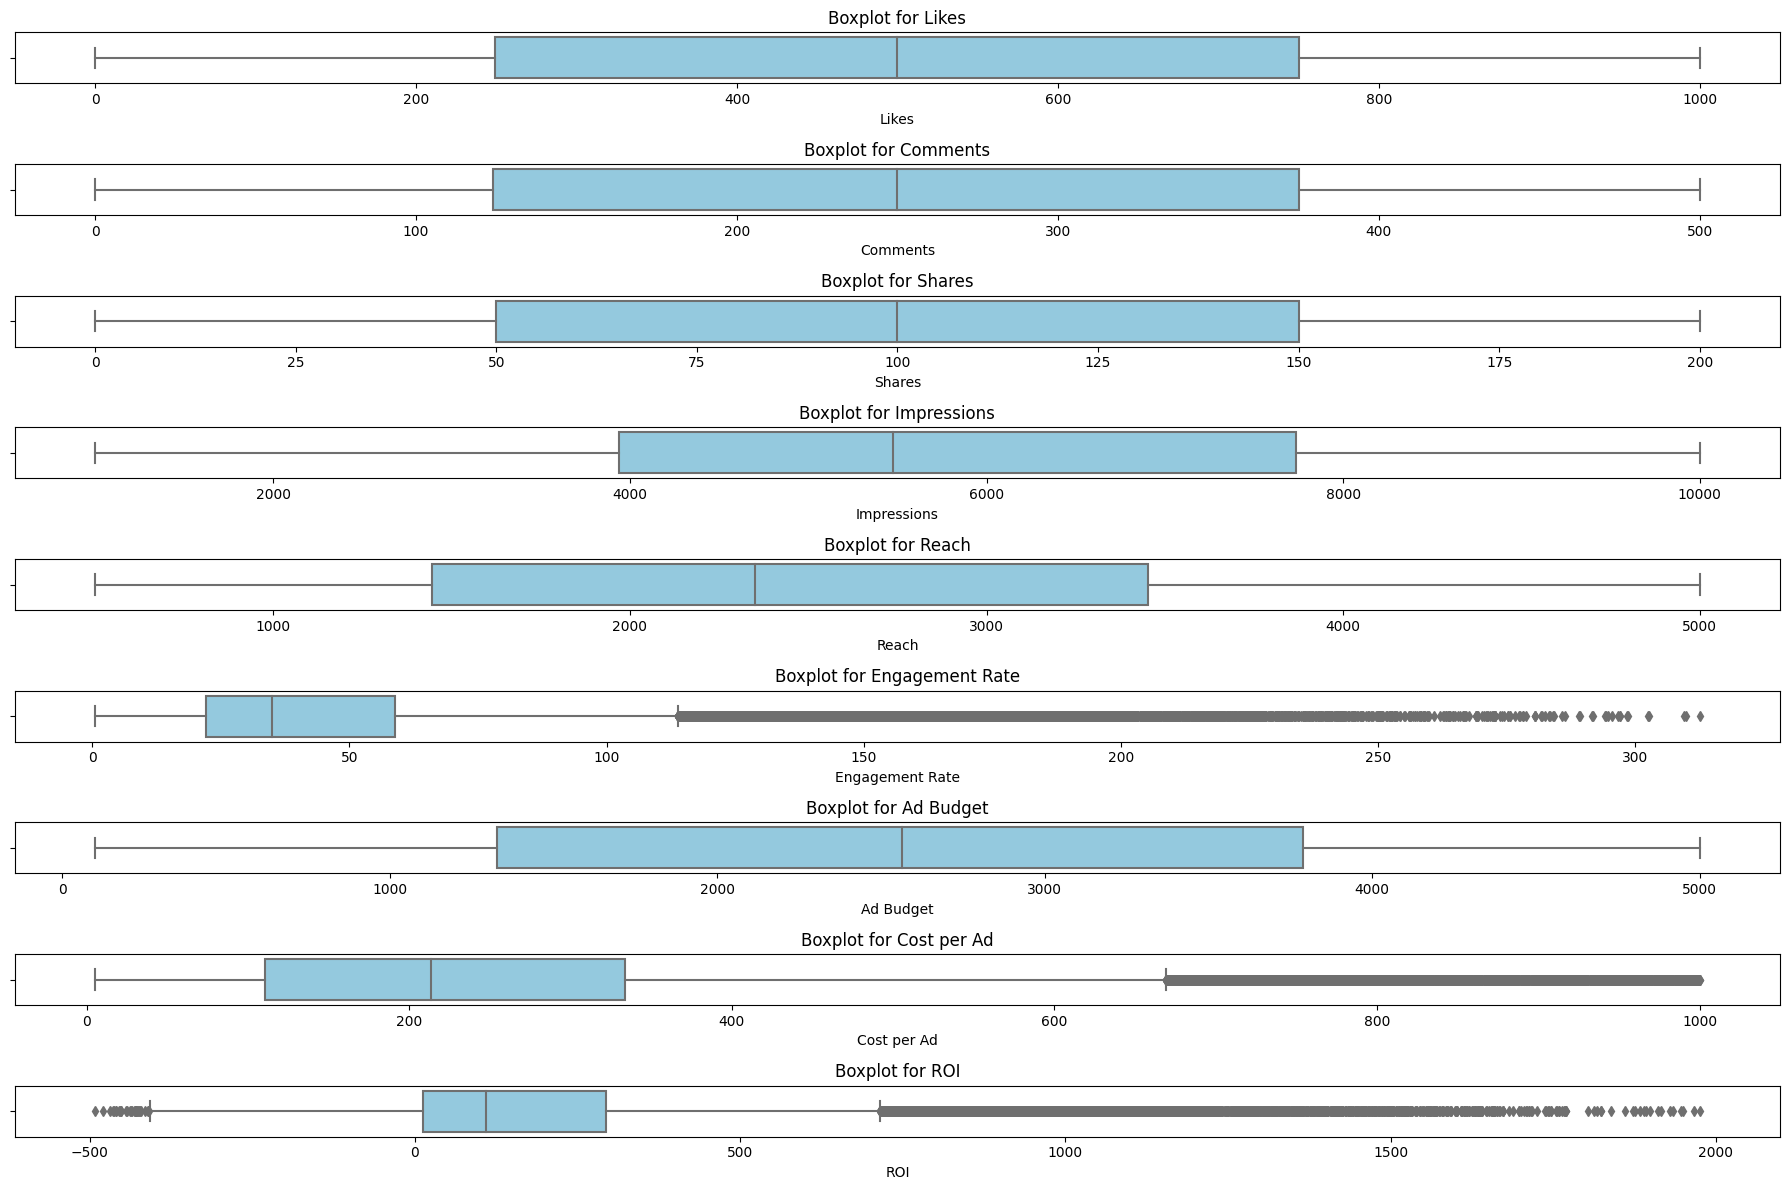

Boxplots After Outlier Removal


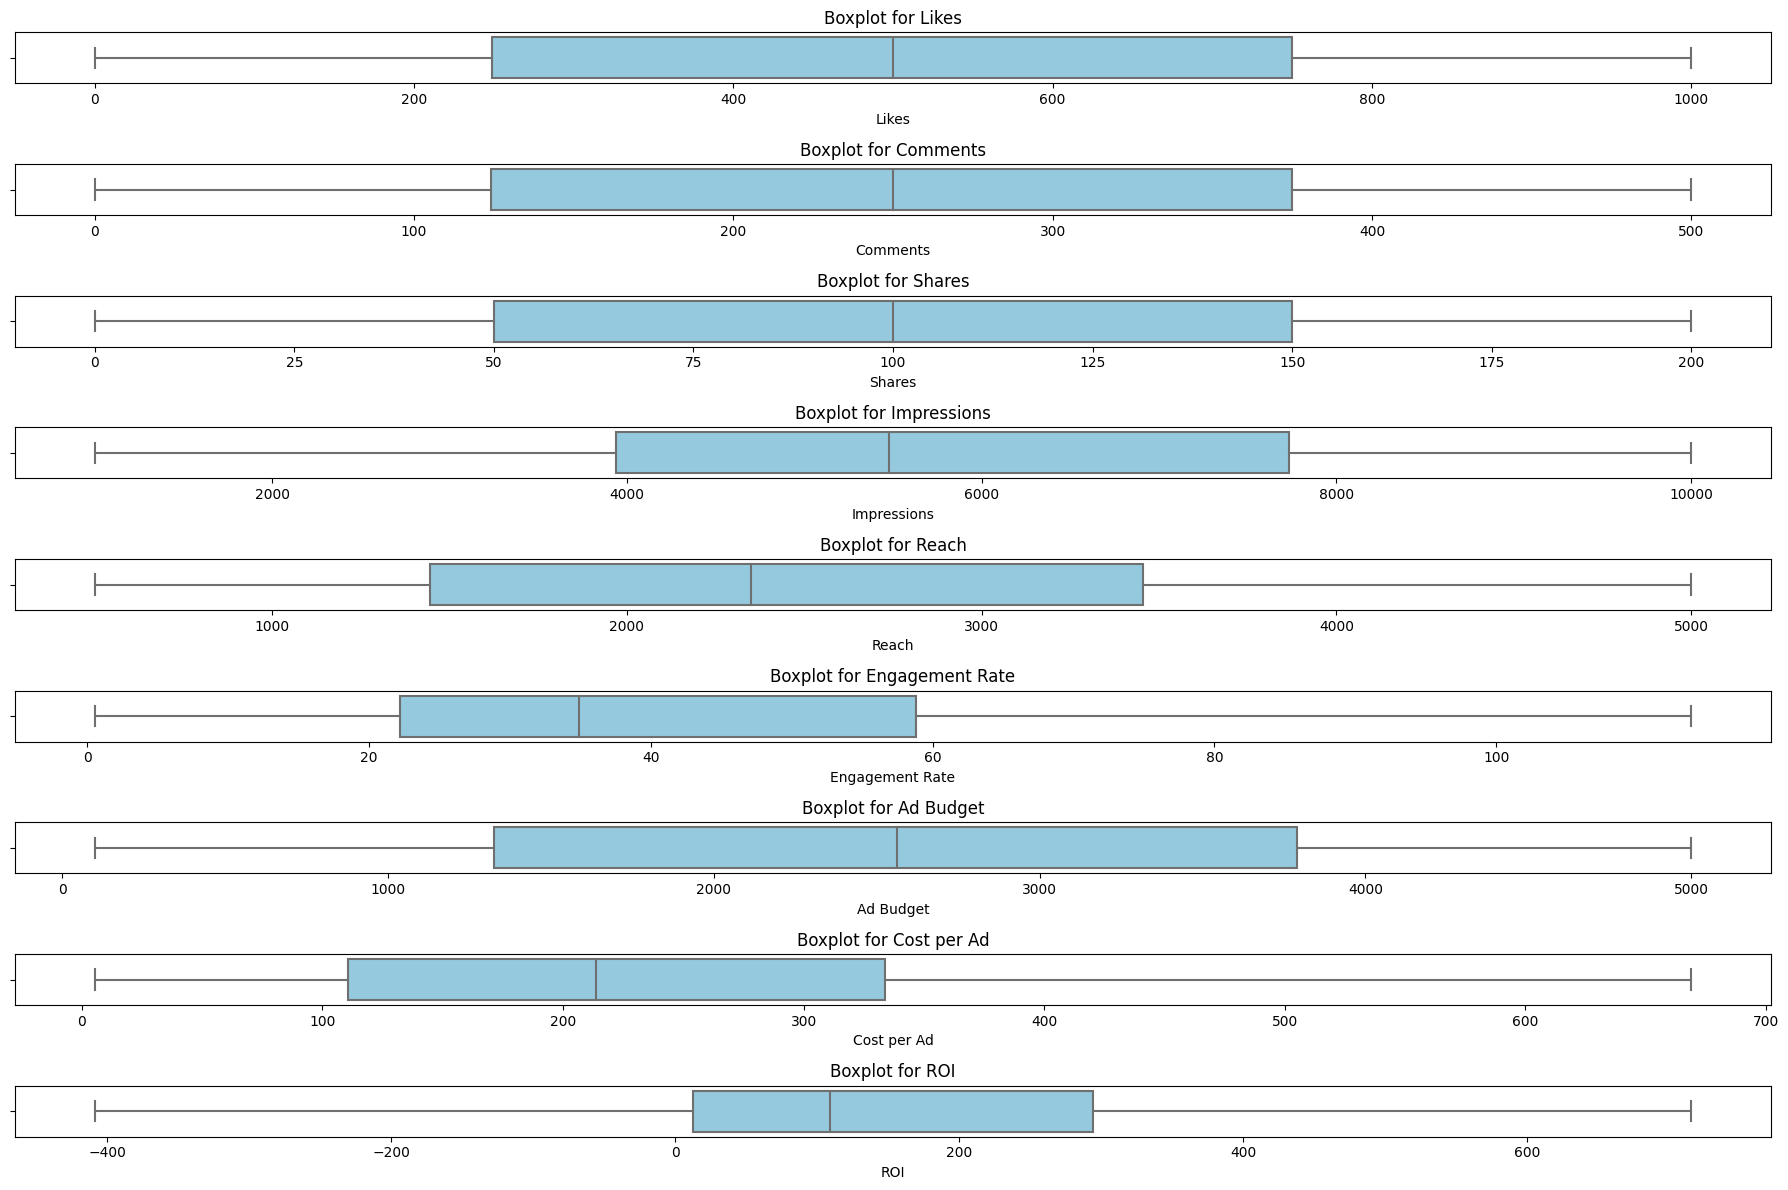

In [20]:
#  Plot before cleaning
print("Boxplots Before Outlier Removal")
plot_boxplots(df_cleaned, columns_to_check)

#  Clean outliers
cleaned_data = clean_outliers_iqr(df_cleaned, columns_to_check)

# Plot after cleaning
print("Boxplots After Outlier Removal")
plot_boxplots(cleaned_data, columns_to_check)


In [21]:
# Save cleaned data
df_cleaned.to_excel('cleaned_social_media_engagement_data.xlsx', index=False)

## 3. Exploratory Data Analysis

In [22]:
# Compute summary statistics
summary_stats = df_cleaned.describe().transpose()

# Add range calculation (max - min)
summary_stats['range'] = summary_stats['max'] - summary_stats['min']

# Select relevant columns
summary_stats = summary_stats[['mean', 'std', 'min', 'max', 'range']]

summary_stats

mean          std          min           max  \
Likes             499.396240   289.097792     0.000000   1000.000000   
Comments          249.699200   144.611199     0.000000    500.000000   
Shares            100.118510    57.924815     0.000000    200.000000   
Impressions      5752.672630  2311.248023  1000.000000  10000.000000   
Reach            2486.476410  1219.800837   500.000000   5000.000000   
Engagement Rate    46.919121    37.891570     0.543124    312.547529   
Audience Age       41.514740    13.867187    18.000000     65.000000   
Ad Budget        2559.222780  1419.819492   100.000000   5000.000000   
Cost per Ad       249.543608   185.729540     5.315789   1000.000000   
ROI               187.594090   264.483140  -491.445607   1975.190983   

                       range  
Likes            1000.000000  
Comments          500.000000  
Shares            200.000000  
Impressions      9000.000000  
Reach            4500.000000  
Engagement Rate   312.004404  
Audience Age       47.000000  
Ad Budget        4900.000000  
Cost per Ad       994.684211  
ROI              2466.636589

c:\users\sameera\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


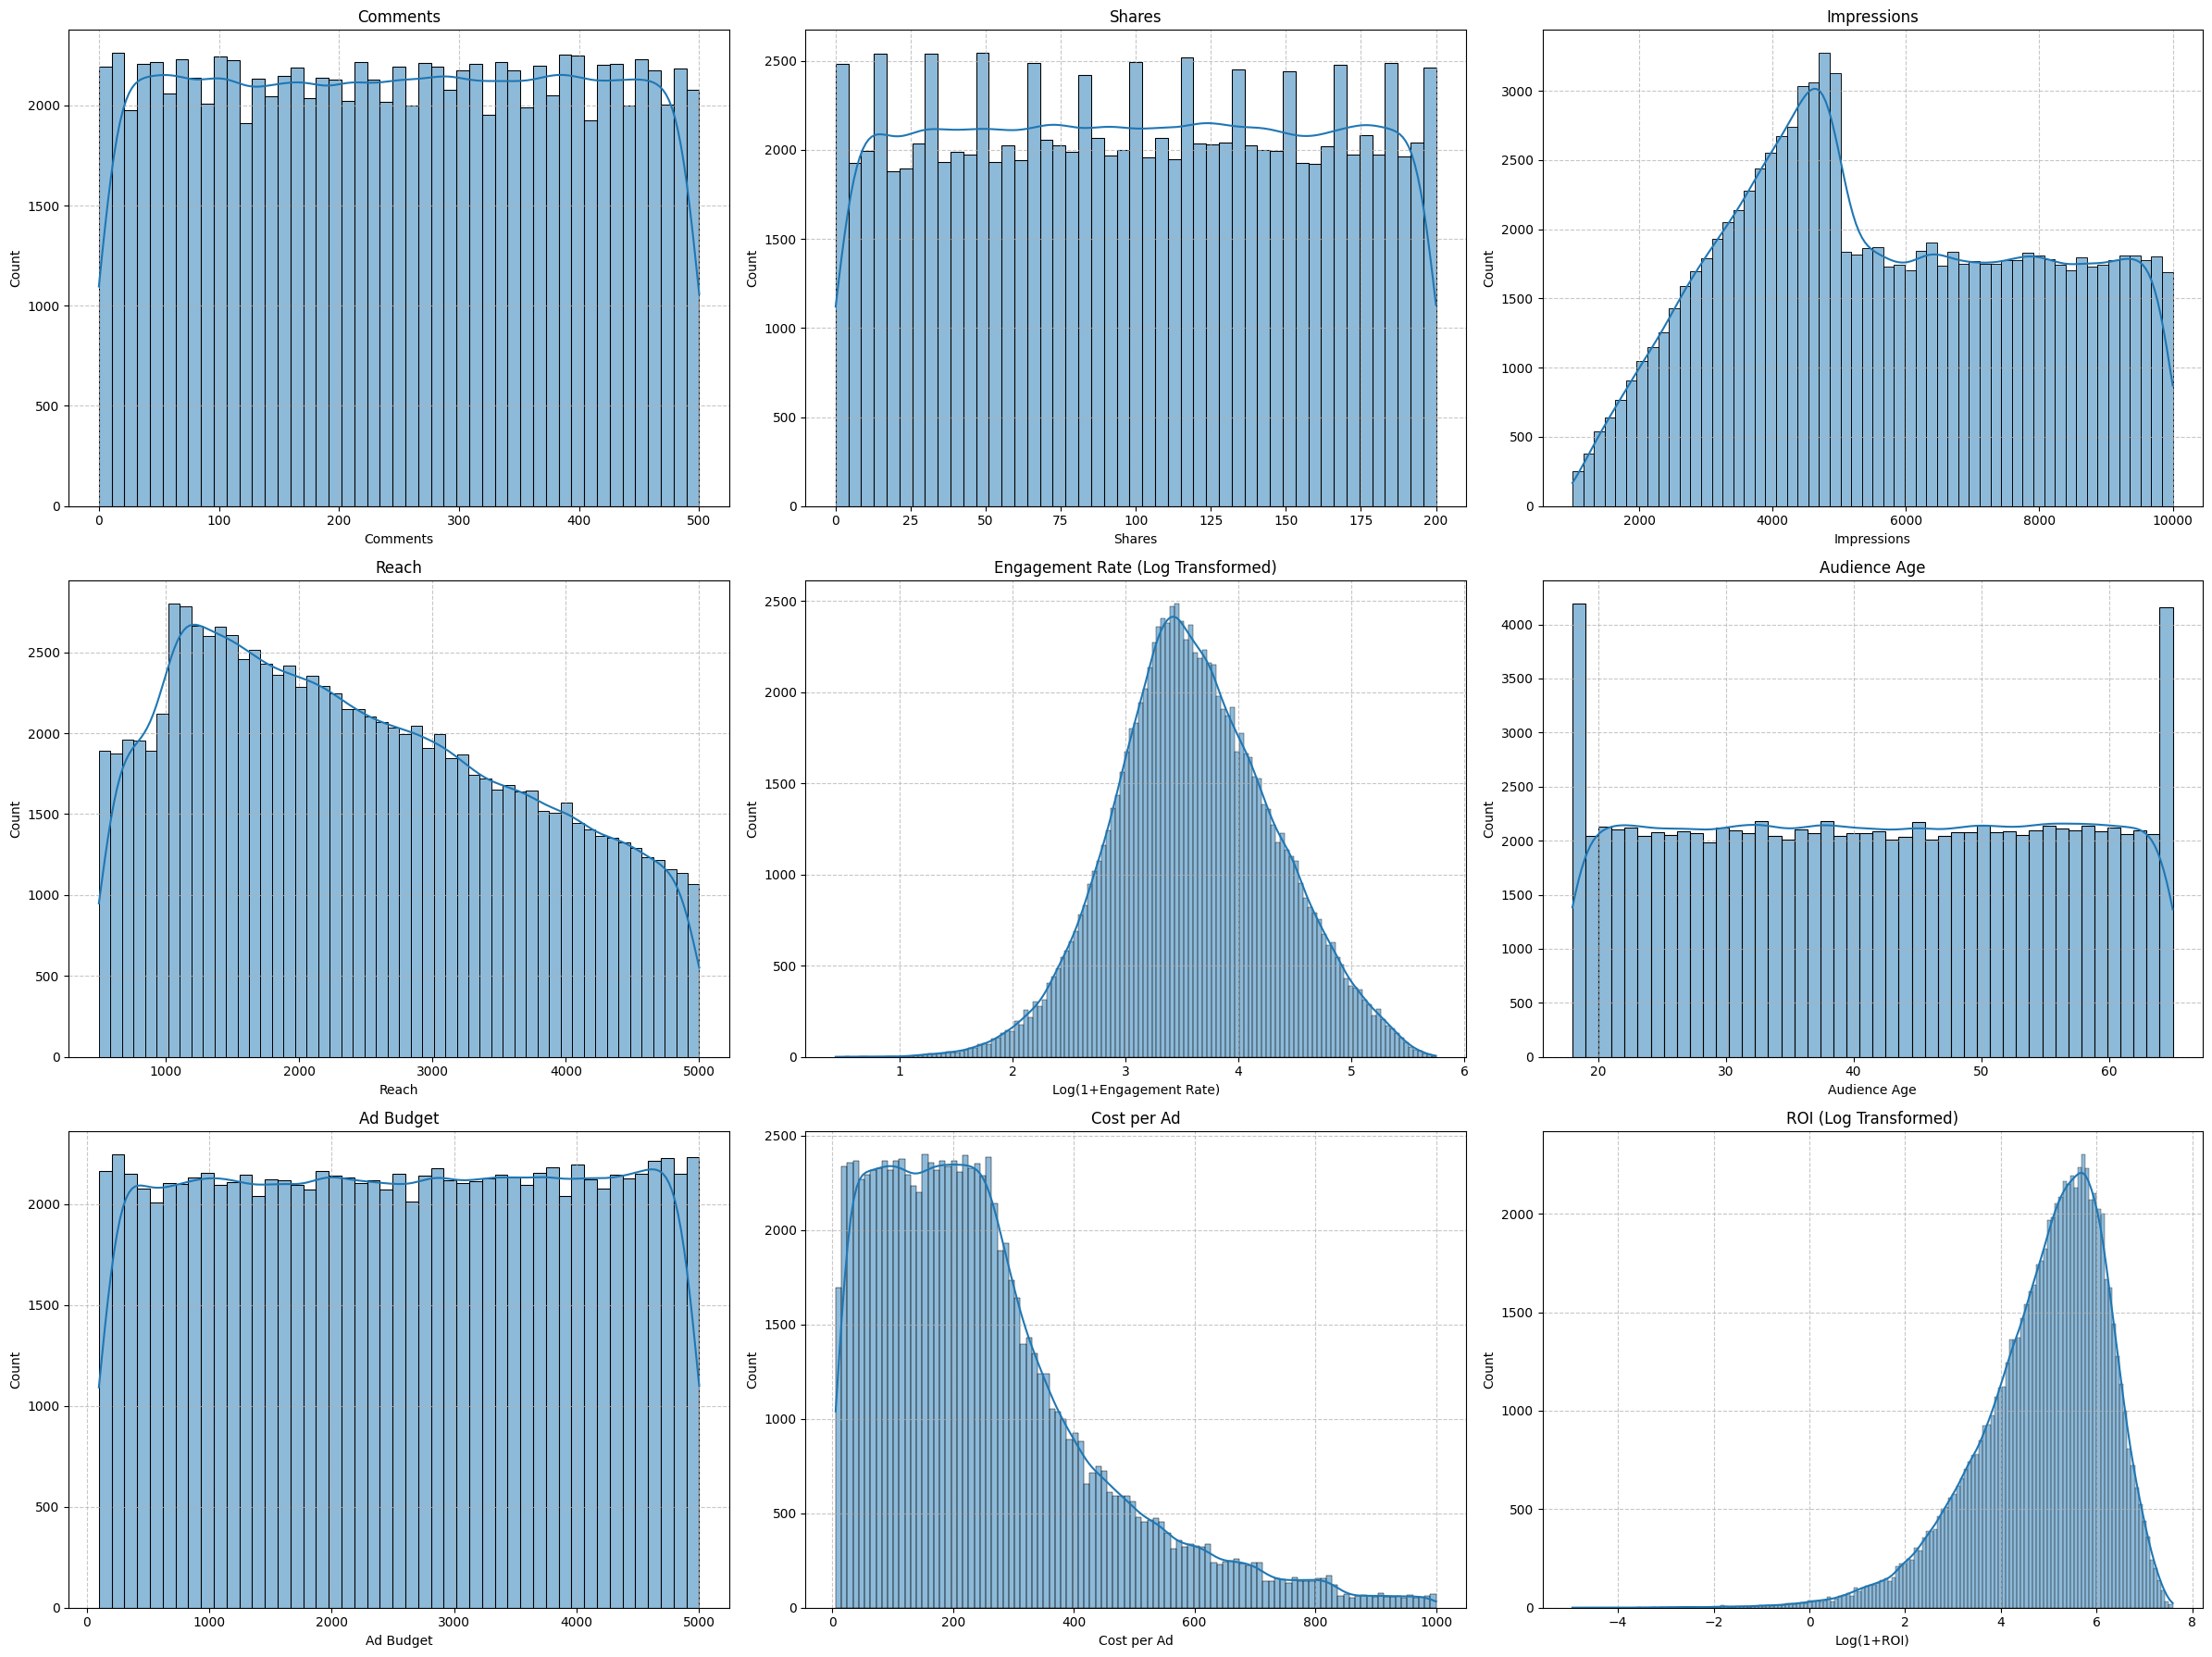

In [23]:
fig, axs = plt.subplots(3, 3, figsize=(24, 18))
axs = axs.flatten()


numeric_columns = ['Comments', 'Shares', 'Impressions', 'Reach', 
                   'Engagement Rate', 'Audience Age', 'Ad Budget', 
                   'Cost per Ad', 'ROI']  # Should have exactly 9 columns

for i, col in enumerate(numeric_columns):
    if i >= len(axs):
        break  # Avoid going out of bounds

    data = Social_media_df[col].dropna()
    skewness = data.skew()

    plt_data = np.log1p(data) if skewness > 1.5 else data

    sns.histplot(plt_data, bins='auto', kde=True, ax=axs[i], edgecolor='black')

    if skewness > 1.5:
        axs[i].set_title(f'{col} (Log Transformed)')
        axs[i].set_xlabel(f'Log(1+{col})')
    else:
        axs[i].set_title(col)
        axs[i].set_xlabel(col)

    axs[i].set_ylabel('Count')
    axs[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

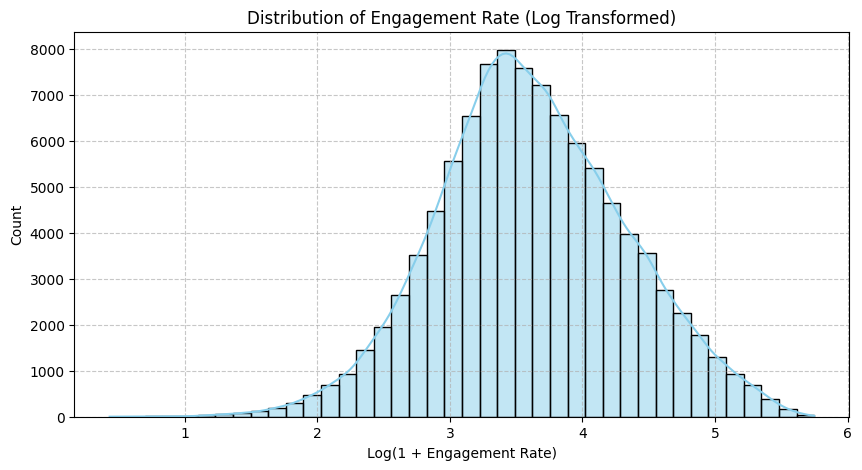

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df_cleaned['Engagement Rate']), kde=True, bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Engagement Rate (Log Transformed)')
plt.xlabel('Log(1 + Engagement Rate)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [25]:
numeric_data = df_cleaned.select_dtypes(include=['float64', 'int64'])
if 'Engagement Rate' in numeric_data.columns:
    cols = ['Engagement Rate'] + [col for col in numeric_data.columns if col != 'Engagement Rate']
    numeric_data = numeric_data[cols]
# Compute the correlation matrix again after reordering
corr = numeric_data.corr()

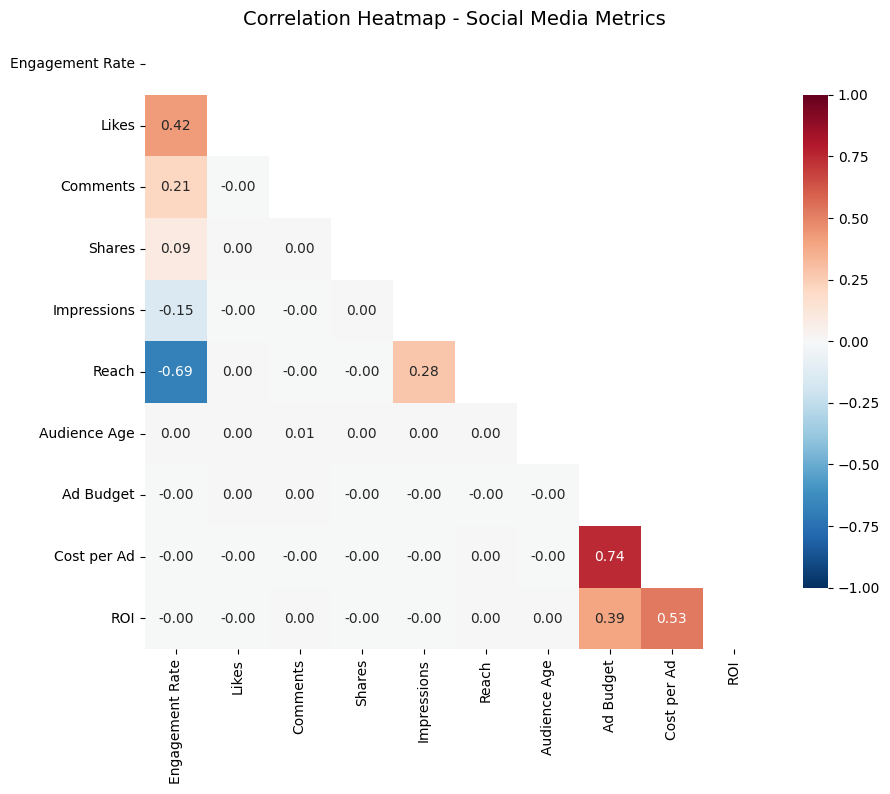

In [26]:
# Create lower triangle mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', vmin=-1, vmax=1,
            cbar_kws={'shrink': .8}, annot_kws={"size": 10})
plt.title('Correlation Heatmap - Social Media Metrics', fontsize=14)
plt.show()

<Figure size 800x600 with 0 Axes>

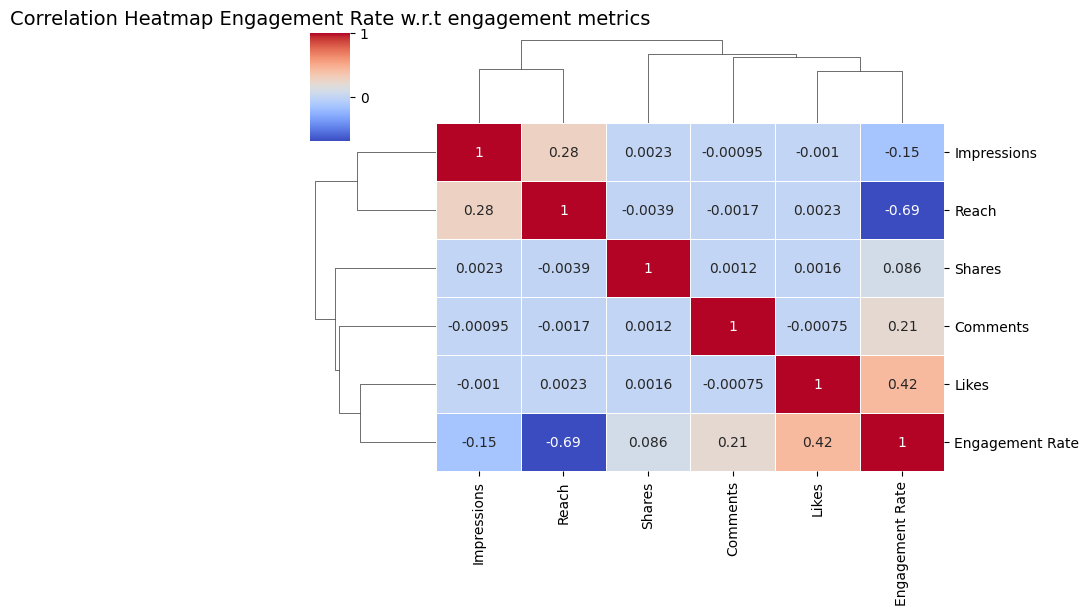

In [27]:
selected_columns = ["Likes", "Shares", "Comments", "Impressions", "Reach", "Engagement Rate"]
df_selected= numeric_data[selected_columns].corr()

# Create a cluster map
plt.figure(figsize=(8, 6))
sns.clustermap(df_selected, annot=True, cmap="coolwarm", linewidths=0.5, figsize=(8, 6))
plt.title('Correlation Heatmap Engagement Rate w.r.t engagement metrics', fontsize=14)
# Show the plot
plt.show()

In [28]:
# Grouping by 'Weekend and Weekday' and 'Hour' to calculate the average engagement rate
day_engagement = df_cleaned.groupby(['Weekday Type', 'Time Periods'])['Engagement Rate'].mean().reset_index()

# Sorting by 'Engagement Rate' in descending order
day_engagement = day_engagement.sort_values(by='Engagement Rate', ascending=False)

# Display the result
day_engagement

Weekday Type Time Periods  Engagement Rate
1      Weekday      Evening        47.300420
0      Weekday    Afternoon        47.168241
6      Weekend      Morning        46.979731
7      Weekend        Night        46.930520
3      Weekday        Night        46.916827
4      Weekend    Afternoon        46.727361
2      Weekday      Morning        46.641661
5      Weekend      Evening        46.262828

In [29]:
def time_date_split(df_cleaned, col):
    df_cleaned['Year'] = pd.to_datetime(df_cleaned[col]).dt.year  # Ensure conversion

# Apply the function to extract the year
time_date_split(working_file, 'Post Timestamp')

In [30]:
print(df_cleaned.columns)

Index(['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp',
       'Date', 'Weekday Type', 'Time', 'Time Periods', 'Likes', 'Comments',
       'Shares', 'Impressions', 'Reach', 'Engagement Rate', 'Audience Age',
       'Age Group', 'Audience Gender', 'Audience Location',
       'Audience Continent', 'Audience Interests', 'Sentiment', 'Ad Budget',
       'Cost per Ad', 'ROI'],
      dtype='object')


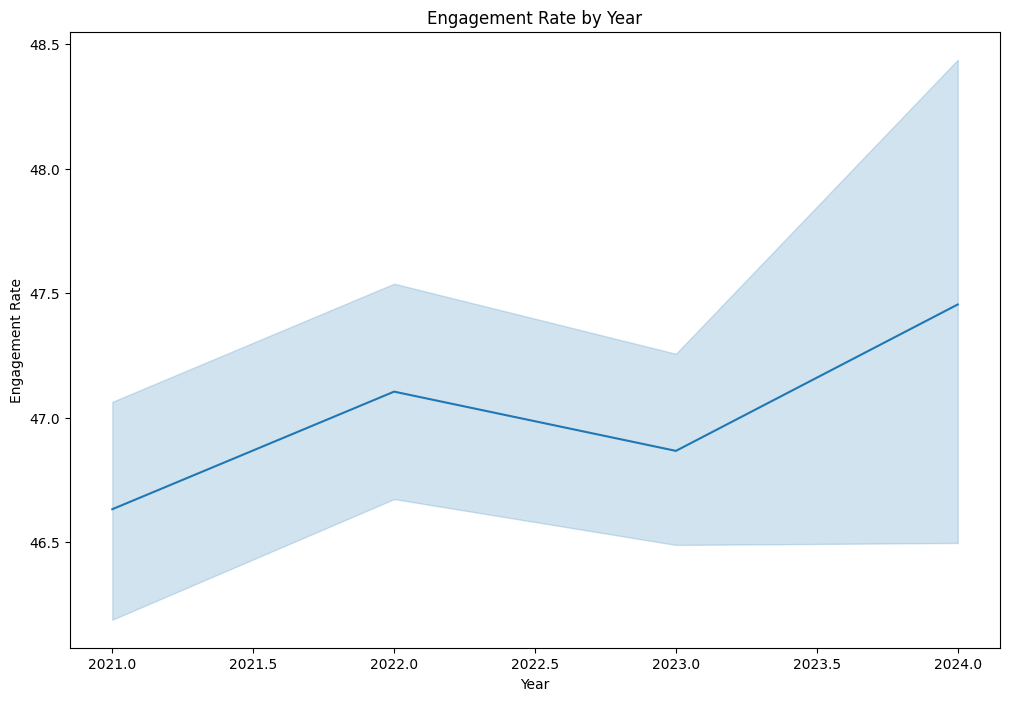

In [31]:
df_cleaned['Post Timestamp'] = pd.to_datetime(df_cleaned['Post Timestamp'])
df_cleaned['Year'] = df_cleaned['Post Timestamp'].dt.year
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_cleaned, x='Year', y='Engagement Rate')

plt.title('Engagement Rate by Year')
plt.xlabel('Year')
plt.ylabel('Engagement Rate')
plt.show()

In [32]:
# Convert 'Date' column to datetime format if not already
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Create 'Month' column
df_cleaned['Month'] = df_cleaned['Date'].dt.month_name()

# Group by Month and calculate mean
monthly_trends = df_cleaned.groupby('Month')[['Likes','Shares','Comments','Impressions', 'Reach', 'ROI']].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
     'September', 'October', 'November', 'December']
)

monthly_trends


Likes      Shares    Comments  Impressions        Reach  \
Month                                                                     
January    499.633411  100.708585  249.736659  5736.154524  2467.052552   
February   501.285214  101.601918  247.898665  5709.666969  2485.934171   
March      502.127167   99.118380  249.733674  5758.149133  2478.142721   
April      495.478014  100.973197  248.927866  5759.987772  2492.255311   
May        496.790409   99.627485  251.334035  5745.859883  2465.906901   
June       496.816663  100.602669  248.896730  5762.924621  2505.859702   
July       500.314566  100.080146  251.358947  5766.075071  2482.202314   
August     500.304504   99.603857  250.343675  5703.995448  2501.525874   
September  498.596072  100.350494  251.034525  5782.634134  2495.873612   
October    501.695229   99.371825  248.723119  5738.778899  2477.196060   
November   501.742902  100.489293  247.972209  5780.508662  2494.379572   
December   498.006571   99.070641  250.217320  5784.918564  2493.013729   

                  ROI  
Month                  
January    187.096566  
February   188.258558  
March      186.249791  
April      186.473551  
May        186.918316  
June       185.741974  
July       190.163064  
August     185.994118  
September  191.037882  
October    186.626653  
November   189.662170  
December   187.014824

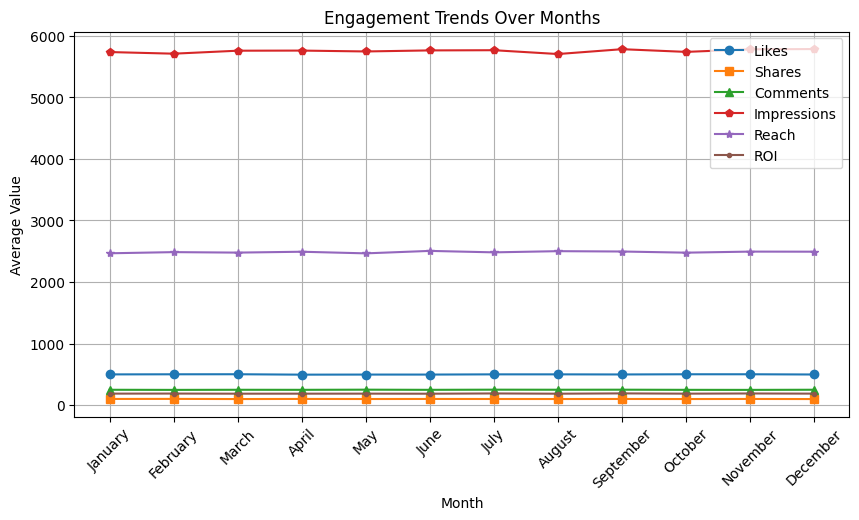

In [33]:
# Plot trends over the months
plt.figure(figsize=(10,5))
plt.plot(monthly_trends.index, monthly_trends['Likes'], marker='o', label='Likes')
plt.plot(monthly_trends.index, monthly_trends['Shares'], marker='s', label='Shares')
plt.plot(monthly_trends.index, monthly_trends['Comments'], marker='^', label='Comments')
plt.plot(monthly_trends.index, monthly_trends['Impressions'], marker='p', label='Impressions')
plt.plot(monthly_trends.index, monthly_trends['Reach'], marker='*', label='Reach')
plt.plot(monthly_trends.index, monthly_trends['ROI'], marker='.', label='ROI')
plt.title('Engagement Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

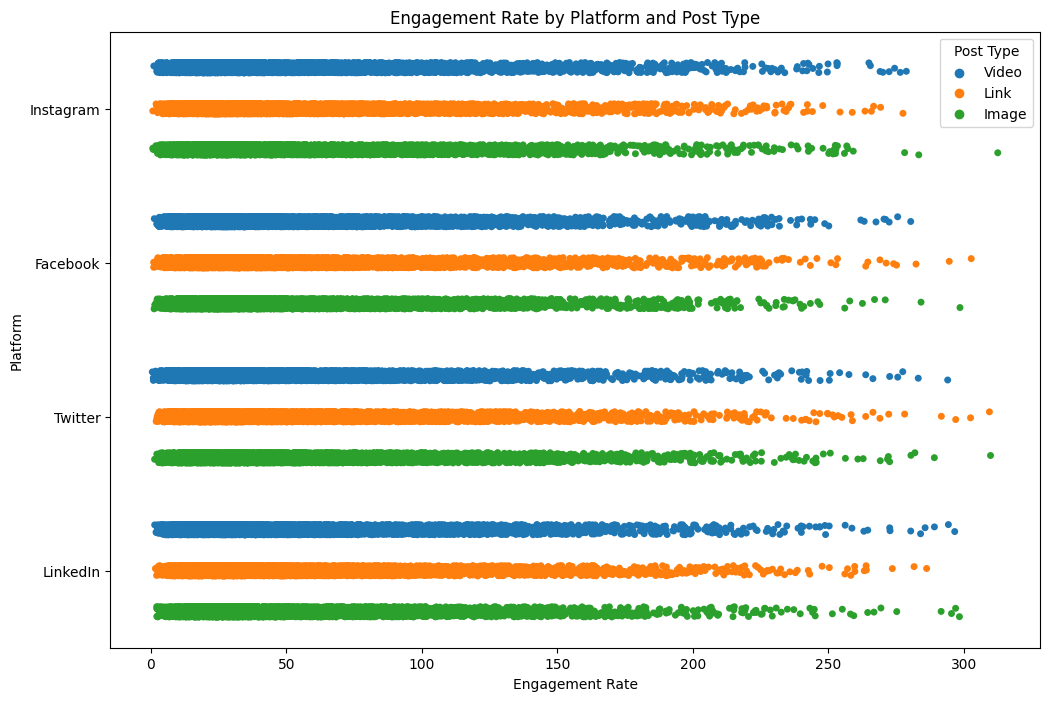

In [34]:
plt.figure(figsize=(12, 8))
sns.stripplot(
    data=df_cleaned,
    x='Engagement Rate',
    y='Platform',
    hue='Post Type',
    dodge=True,
    jitter=True
)

plt.title('Engagement Rate by Platform and Post Type')
plt.xlabel('Engagement Rate')
plt.ylabel('Platform')
plt.show()

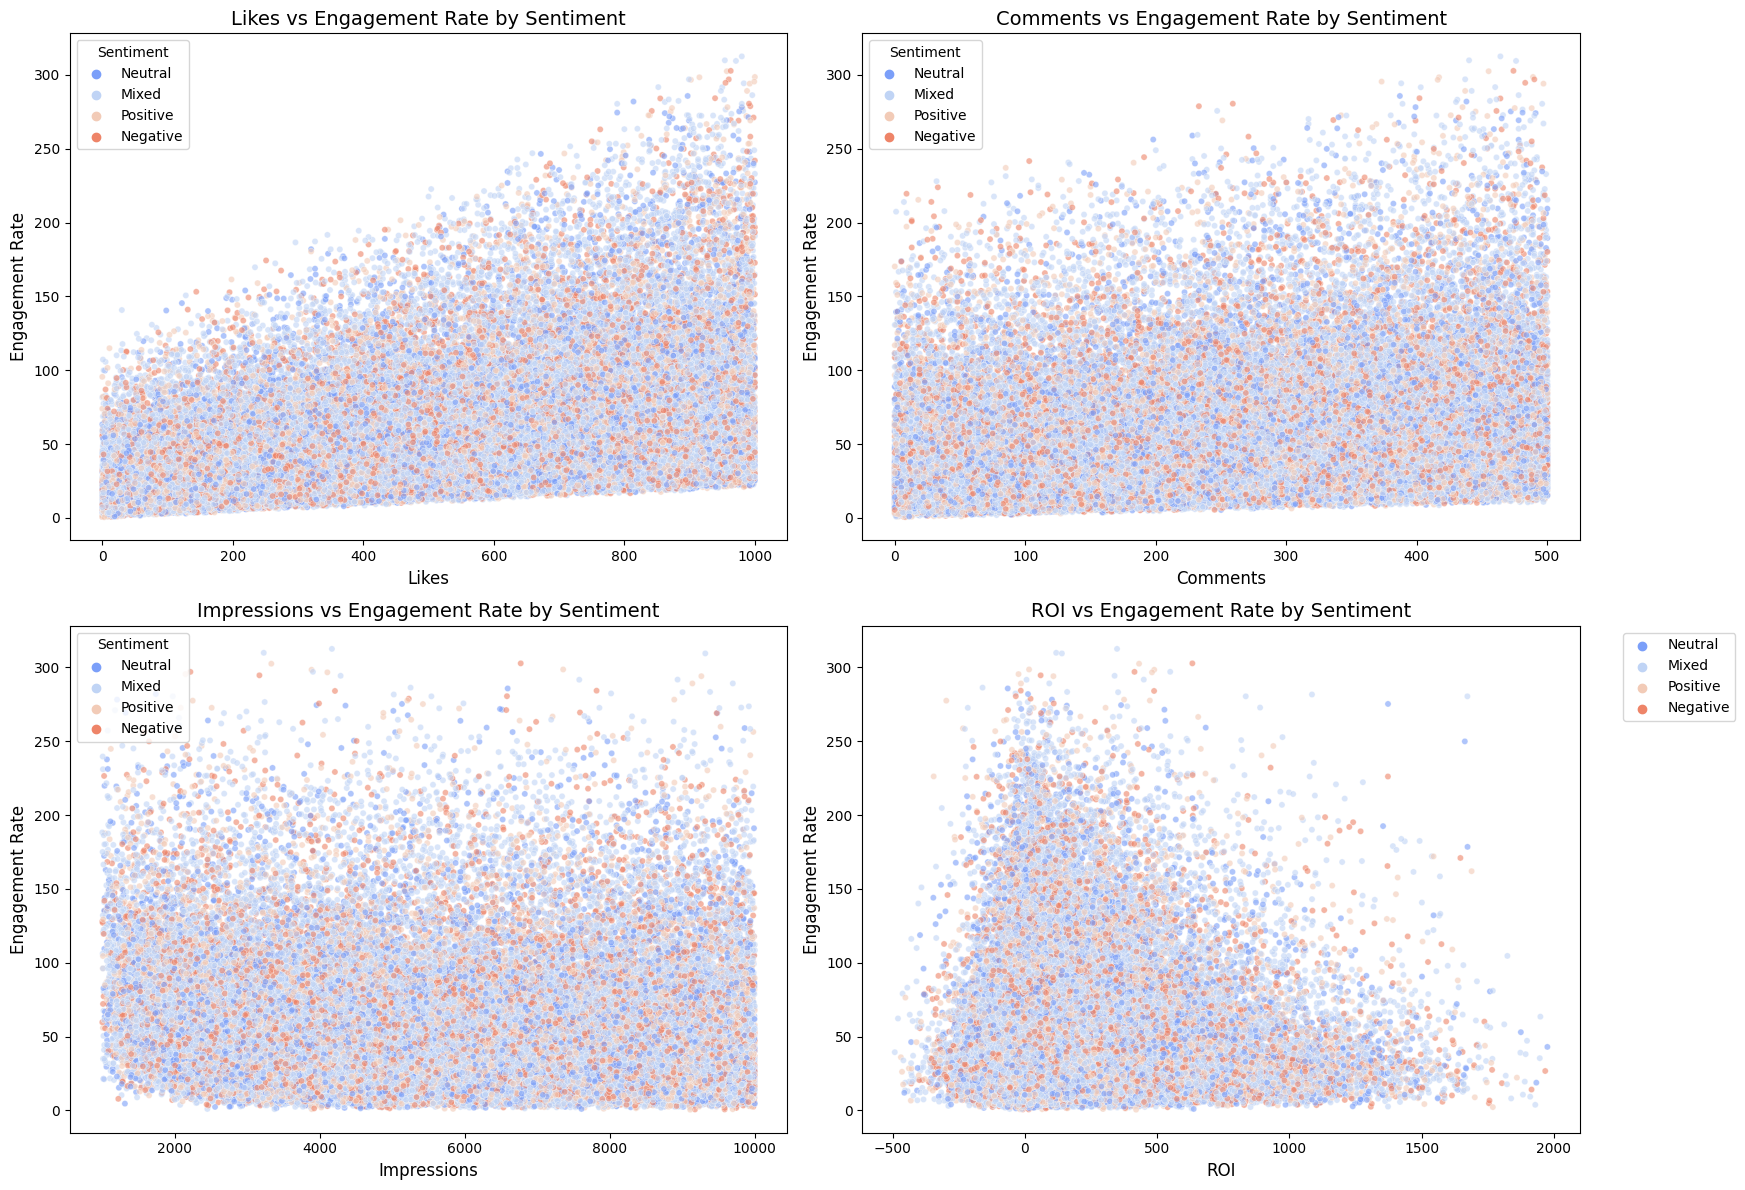

In [35]:
# Define plot size
plt.figure(figsize=(16, 12))

# Plot 1: Likes vs Engagement Rate with color by Sentiment
plt.subplot(2, 2, 1)
sns.scatterplot(
    x='Likes', 
    y='Engagement Rate', 
    hue='Sentiment', 
    data=df_cleaned, 
    palette='coolwarm',
    s=20,            
    alpha=0.6,        
    edgecolor='w'     
)
plt.title('Likes vs Engagement Rate by Sentiment', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)

# Plot 2: Comments vs Engagement Rate
plt.subplot(2, 2, 2)
sns.scatterplot(
    x='Comments', 
    y='Engagement Rate', 
    hue='Sentiment', 
    data=df_cleaned,
    palette='coolwarm',
    s=20,
    alpha=0.6,
    edgecolor='w'
)
plt.title('Comments vs Engagement Rate by Sentiment', fontsize=14)
plt.xlabel('Comments', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)

# Plot 3: Impressions vs Engagement Rate
plt.subplot(2, 2, 3)
sns.scatterplot(
    x='Impressions', 
    y='Engagement Rate', 
    hue='Sentiment', 
    data=df_cleaned, 
    palette='coolwarm',
    s=20,
    alpha=0.6,
    edgecolor='w'
)
plt.title('Impressions vs Engagement Rate by Sentiment', fontsize=14)
plt.xlabel('Impressions', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)

# Plot 4: ROI vs Engagement Rate
plt.subplot(2, 2, 4)
sns.scatterplot(
    x='ROI', 
    y='Engagement Rate', 
    hue='Sentiment', 
    data=df_cleaned, 
    palette='coolwarm',
    s=20,
    alpha=0.6,
    edgecolor='w'
)
plt.title('ROI vs Engagement Rate by Sentiment', fontsize=14)
plt.xlabel('ROI', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)

# Final layout adjustments
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [36]:
continent_age_group_counts = df_cleaned.groupby(['Audience Continent', 'Age Group']).size().unstack(fill_value=0)

<AxesSubplot:xlabel='Audience Continent'>

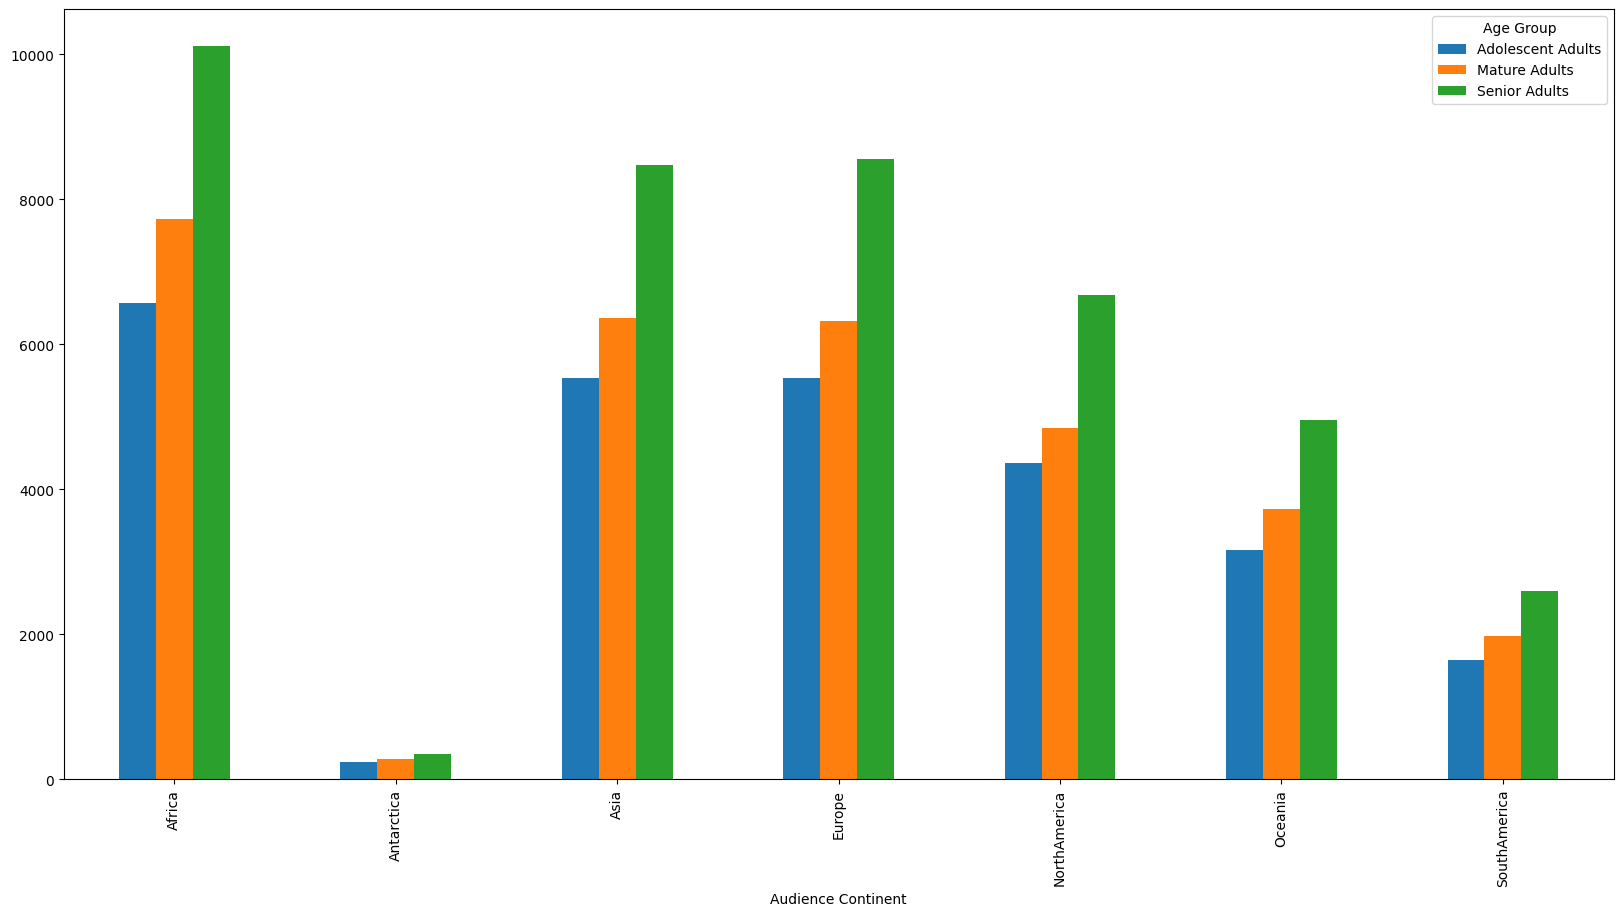

In [37]:
continent_age_group_counts.plot(kind='bar', figsize=(20,10))

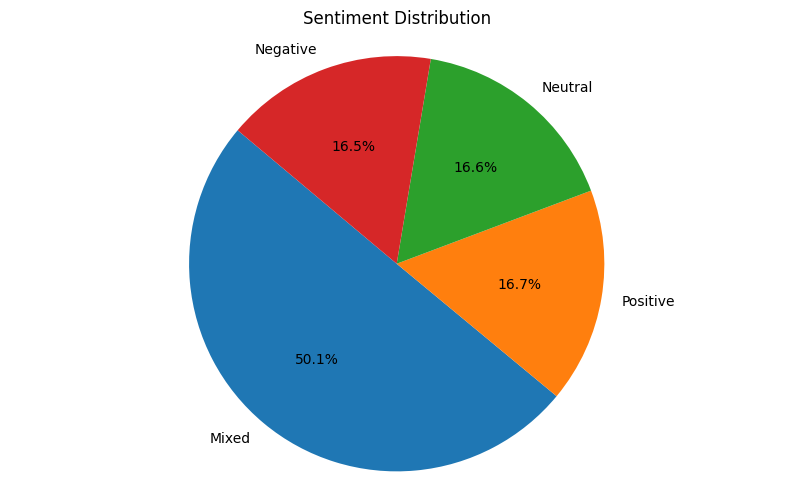

In [38]:
sentiment_counts = df_cleaned['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [39]:
# Aggregate engagement metrics by sentiment category
engagement_by_sentiment = df_cleaned.groupby("Sentiment")[["Likes", "Comments", "Shares"]].mean().reset_index()

# Melt the dataframe for easier plotting
engagement_melted = engagement_by_sentiment.melt(id_vars="Sentiment", var_name="Engagement Type", value_name="Value")

# Create the bar chart using Plotly
fig = px.bar(engagement_melted, x="Sentiment", y="Value", color="Engagement Type", 
             barmode="group", title="Engagement by Sentiment", labels={"Value": "Average Engagement"})

# Show the chart
fig.show()

## 4. Feature Engineering

In [40]:
Engagement_WeekType = df_cleaned.groupby('Weekday Type')[['Likes', 'Comments',
    'Shares', 'Impressions', 'Reach', 'Engagement Rate', 'Ad Budget', 'Cost per Ad', 'ROI']].mean()

Engagement_WeekType

Likes    Comments      Shares  Impressions        Reach  \
Weekday Type                                                                 
Weekday       500.393009  249.794162  100.056014  5757.004226  2487.866156   
Weekend       496.899986  249.461382  100.275021  5741.824818  2482.996005   

              Engagement Rate    Ad Budget  Cost per Ad         ROI  
Weekday Type                                                         
Weekday             46.975205  2554.685212   249.242213  188.008599  
Weekend             46.778667  2570.586417   250.298407  186.556017

In [41]:
df_cleaned.groupby('Platform').mean()

Likes    Comments      Shares  Impressions        Reach  \
Platform                                                                  
Facebook   500.728365  250.453997  100.362113  5768.218176  2492.605290   
Instagram  499.409946  250.458345   99.467083  5736.976807  2485.844333   
LinkedIn   496.330455  248.046167  100.140611  5758.335827  2478.753244   
Twitter    501.127107  249.854293  100.498569  5747.138235  2488.752623   

           Engagement Rate  Audience Age    Ad Budget  Cost per Ad  \
Platform                                                             
Facebook         46.910491     41.543551  2564.254713   250.906362   
Instagram        47.125036     41.570042  2552.337105   248.065003   
LinkedIn         46.725034     41.528098  2564.857837   250.454339   
Twitter          46.918224     41.418323  2555.416335   248.746081   

                  ROI         Year  
Platform                            
Facebook   188.281695  2022.186704  
Instagram  185.619389  2022.181035  
LinkedIn   189.259227  2022.191196  
Twitter    187.200471  2022.193919

In [42]:
# Define the proper orderings
#Senior Adults = 2 ,Mature Adults = 1 ,Adolescent Adults = 0
age_group_order = ['Adolescent Adults', 'Mature Adults', 'Senior Adults']
sentiment_order = ['Negative', 'Neutral', 'Mixed', 'Positive']

# Apply encoding directly to the correct dataframe (e.g., working_file)
df_cleaned['Age Group'] = pd.Categorical(df_cleaned['Age Group'], categories=age_group_order, ordered=True).codes
df_cleaned['Sentiment'] = pd.Categorical(df_cleaned['Sentiment'], categories=sentiment_order, ordered=True).codes

# One-hot encode nominal categorical features
data_encoded = pd.get_dummies(df_cleaned, columns=[
    'Platform', 'Post Type', 'Weekday Type', 'Time Periods', 
    'Audience Gender', 'Audience Continent'
], drop_first=True)

print("Encoded Data Sample:")
data_encoded.head()

Encoded Data Sample:


Post ID  \
0  16ce29c5-2dc7-478f-9814-a86754f3ce8b   
1  a30c948b-0fb3-4e92-95da-e2dea184f568   
2  aee74d06-c775-459c-8fc4-013ce25644f1   
3  80415748-a509-4fc6-8b55-74f2babe5dac   
4  14d34185-639a-4508-a8b6-02a743fe0dbc   

                                       Post Content          Post Timestamp  \
0                      Increase fast partner south. 2023-07-30 06:40:06.356   
1           Floor glass bring indicate seem detail. 2022-06-19 14:15:59.833   
2  Customer stop language everybody rest chance me. 2022-06-04 06:19:50.403   
3                     Town find identify game your. 2022-05-12 15:41:21.902   
4                            Seem strategy you cup. 2023-10-26 20:53:33.135   

        Date                    Time  Likes  Comments  Shares  Impressions  \
0 2023-07-30 2023-07-30 06:40:06.356    908       125      85         3884   
1 2022-06-19 2022-06-19 14:15:59.833    604        29       2         1831   
2 2022-06-04 2022-06-04 06:19:50.403    288       230      56         3927   
3 2022-05-12 2022-05-12 15:41:21.902    870        92      15         4829   
4 2023-10-26 2023-10-26 20:53:33.135    573       192      19         2797   

   Reach  ...  Time Periods_Morning  Time Periods_Night  Audience Gender_Male  \
0   1223  ...                     1                   0                     1   
1   1386  ...                     0                   0                     0   
2   2516  ...                     1                   0                     0   
3   1377  ...                     0                   0                     1   
4   1949  ...                     0                   0                     1   

  Audience Gender_Other Audience Continent_Antarctica  \
0                     0                             0   
1                     0                             0   
2                     1                             0   
3                     0                             0   
4                     0                             0   

   Audience Continent_Asia  Audience Continent_Europe  \
0                        0                          1   
1                        1                          0   
2                        1                          0   
3                        0                          0   
4                        0                          0   

   Audience Continent_NorthAmerica  Audience Continent_Oceania  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   

   Audience Continent_SouthAmerica  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 38 columns]

In [43]:
##Sentiment column has been numerically encoded to support model evaluation. Mapping: (Neutral = 1, Mixed = 2, Positive = 3, Negative = 0)
print(df_cleaned.shape)
df_cleaned

(100000, 27)


Platform                               Post ID Post Type  \
0      Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
1       Facebook  a30c948b-0fb3-4e92-95da-e2dea184f568      Link   
2        Twitter  aee74d06-c775-459c-8fc4-013ce25644f1     Image   
3      Instagram  80415748-a509-4fc6-8b55-74f2babe5dac     Image   
4       LinkedIn  14d34185-639a-4508-a8b6-02a743fe0dbc      Link   
...          ...                                   ...       ...   
99995   Facebook  bfc611aa-71e3-462d-a200-c671b5f2dd45     Video   
99996   LinkedIn  26534a4f-0cb6-4bb3-b852-d1cadc15584e      Link   
99997   Facebook  df9577d4-9338-4f41-99f9-8e8f1e34febd      Link   
99998   LinkedIn  43cd806e-704b-4718-9924-2555c189f8b2      Link   
99999  Instagram  3485970a-0f34-4304-a60a-f4e3de8e1917      Link   

                                           Post Content  \
0                          Increase fast partner south.   
1               Floor glass bring indicate seem detail.   
2      Customer stop language everybody rest chance me.   
3                         Town find identify game your.   
4                                Seem strategy you cup.   
...                                                 ...   
99995            Stage can finish high attack practice.   
99996                         Trial serious region bit.   
99997                     Pretty general by scene risk.   
99998                 Develop school account wish rate.   
99999        Just might language idea answer data idea.   

               Post Timestamp       Date Weekday Type                    Time  \
0     2023-07-30 06:40:06.356 2023-07-30      Weekend 2023-07-30 06:40:06.356   
1     2022-06-19 14:15:59.833 2022-06-19      Weekend 2022-06-19 14:15:59.833   
2     2022-06-04 06:19:50.403 2022-06-04      Weekend 2022-06-04 06:19:50.403   
3     2022-05-12 15:41:21.902 2022-05-12      Weekday 2022-05-12 15:41:21.902   
4     2023-10-26 20:53:33.135 2023-10-26      Weekday 2023-10-26 20:53:33.135   
...                       ...        ...          ...                     ...   
99995 2024-02-25 16:53:25.804 2024-02-25      Weekend 2024-02-25 16:53:25.804   
99996 2021-12-14 08:14:35.616 2021-12-14      Weekday 2021-12-14 08:14:35.616   
99997 2022-06-24 00:28:30.817 2022-06-24      Weekday 2022-06-24 00:28:30.817   
99998 2023-12-21 23:58:07.906 2023-12-21      Weekday 2023-12-21 23:58:07.906   
99999 2024-03-01 21:03:06.667 2024-03-01      Weekday 2024-03-01 21:03:06.667   

      Time Periods  Likes  ...  Audience Gender  \
0          Morning    908  ...             Male   
1        Afternoon    604  ...           Female   
2          Morning    288  ...            Other   
3        Afternoon    870  ...             Male   
4          Evening    573  ...             Male   
...            ...    ...  ...              ...   
99995    Afternoon    849  ...            Other   
99996      Morning    555  ...             Male   
99997        Night    341  ...             Male   
99998        Night    442  ...             Male   
99999      Evening    313  ...           Female   

                      Audience Location  Audience Continent  \
0                                Greece              Europe   
1      Lao People's Democratic Republic                Asia   
2                                Jordan                Asia   
3                                 Sudan              Africa   
4                                 Gabon              Africa   
...                                 ...                 ...   
99995                            Canada        NorthAmerica   
99996                 Brunei Darussalam                Asia   
99997                          Honduras        NorthAmerica   
99998                           Vanuatu             Oceania   
99999                  Saint Barthelemy        NorthAmerica   

       Audience Interests  Sentiment  Ad Budget  Cost per Ad          ROI  \
0              population          1       1570   112.142857  

In [44]:
# Reverse mapping dictionary (adjust numbers based on your original encoding)
reverse_sentiment_mapping = {
    1: 'Neutral',
    2: 'Mixed',
    3: 'Positive',
    0: 'Negative'
}

# Create a new column with human-readable Sentiment labels
df_cleaned['Sentiment_Label'] = df_cleaned['Sentiment'].map(reverse_sentiment_mapping)

# Quick check
print(df_cleaned[['Sentiment', 'Sentiment_Label']].head())

   Sentiment Sentiment_Label
0          1         Neutral
1          2           Mixed
2          3        Positive
3          3        Positive
4          0        Negative


In [45]:
categorical_columns =['Platform','Post Type','Weekday Type','Time Periods','Audience Gender','Audience Continent','Audience Interests','Month']
numerical_columns =['Likes','Comments','Shares','Impressions','Reach','Engagement Rate','Ad Budget','Year','Sentiment','Cost per Ad', 'ROI']
input_features = categorical_columns + numerical_columns

In [46]:
main_SocialMedia_df = df_cleaned[input_features]
print(main_SocialMedia_df.shape)
main_SocialMedia_df.head()

(100000, 19)


Platform Post Type Weekday Type Time Periods Audience Gender  \
0  Instagram     Video      Weekend      Morning            Male   
1   Facebook      Link      Weekend    Afternoon          Female   
2    Twitter     Image      Weekend      Morning           Other   
3  Instagram     Image      Weekday    Afternoon            Male   
4   LinkedIn      Link      Weekday      Evening            Male   

  Audience Continent Audience Interests    Month  Likes  Comments  Shares  \
0             Europe         population     July    908       125      85   
1               Asia           attorney     June    604        29       2   
2               Asia             affect     June    288       230      56   
3             Africa              money      May    870        92      15   
4             Africa               part  October    573       192      19   

   Impressions  Reach  Engagement Rate  Ad Budget  Year  Sentiment  \
0         3884   1223        91.414554       1570  2023          1   
1         1831   1386        45.815296       4750  2022          2   
2         3927   2516        22.813990       4034  2022          3   
3         4829   1377        70.951344       3682  2022          3   
4         2797   1949        40.225757        192  2023          0   

   Cost per Ad         ROI  
0   112.142857  -27.388109  
1   431.818182 -177.291320  
2   310.307692  105.967069  
3   306.833333  -66.047289  
4    13.714286   21.125003

In [47]:
Benchmark_Model_df = main_SocialMedia_df[main_SocialMedia_df['Engagement Rate'] > -1].copy()

In [48]:
categorical_feature_benchmark = ['Platform']
input_features = categorical_feature_benchmark + ['Likes','Comments','Shares','Impressions','Sentiment','Reach','Ad Budget','Cost per Ad', 'ROI','Year']
target_feature = 'Engagement Rate'

In [49]:
from sklearn.model_selection import train_test_split

X = Benchmark_Model_df[input_features]
y = Benchmark_Model_df[target_feature]

# one-hot encode
X = pd.get_dummies(X)

# Step 3: First split into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42
)

# Validation should be 10/30 = 0.333 of temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=2/3,    # 20/30
    random_state=42
)


print(f"Train Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

Train Set: (70000, 14), (70000,)
Validation Set: (10000, 14), (10000,)
Test Set: (20000, 14), (20000,)


## 5. Model Training

## 5.1 Linear Regression

In [50]:

from sklearn.linear_model import LinearRegression

# Initialize
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict
y_pred = linreg.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Absolute Error (MAE):{:.2f}".format(mae))
print("Mean Squared Error (MSE):{:.2f}".format(mse))
print("Root Mean Squared Error (RMSE):{:.2f}".format(rmse))
print("R2 Score: {:.2f}".format(r2))

Mean Absolute Error (MAE):14.36
Mean Squared Error (MSE):424.83
Root Mean Squared Error (RMSE):20.61
R2 Score: 0.70


Text(0, 0.5, 'Predicted Y')

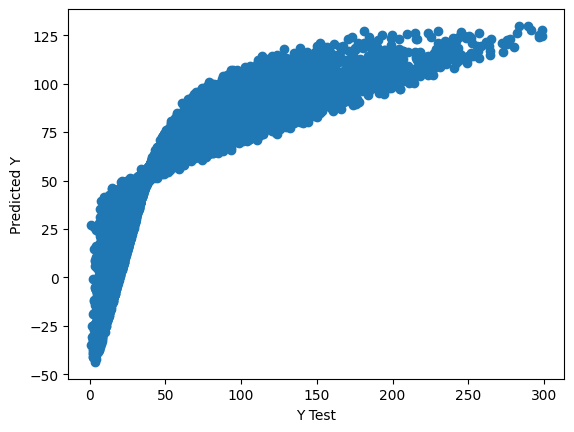

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

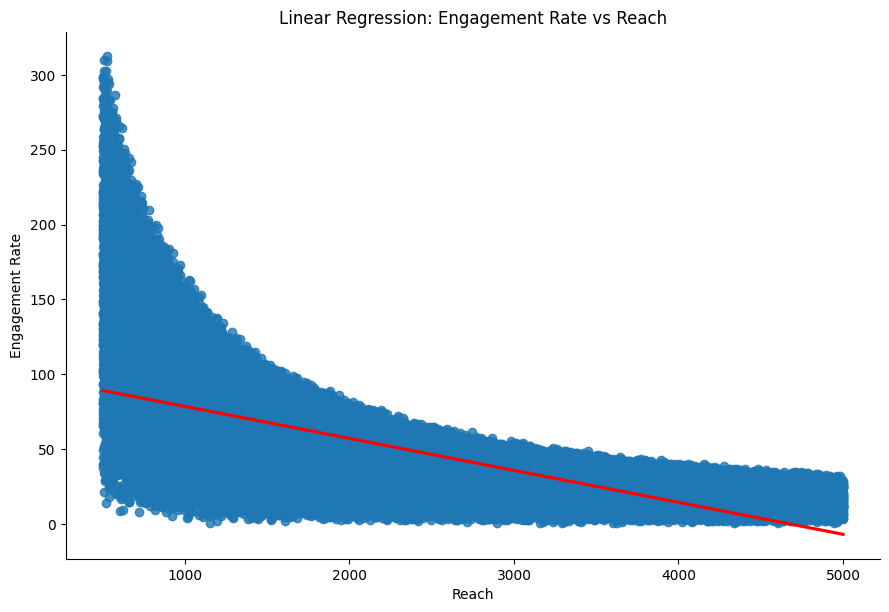

In [53]:
import seaborn as sns

# Visualize relationship with a regression line
sns.lmplot(x='Reach', y='Engagement Rate', data=Benchmark_Model_df, height=6, aspect=1.5, line_kws={'color': 'red'})
plt.title('Linear Regression: Engagement Rate vs Reach')
plt.xlabel('Reach')
plt.ylabel('Engagement Rate')
plt.show()

## 5.2 Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = rando_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics with 2 decimal places
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.01
Mean Squared Error (MSE): 3.26
Root Mean Squared Error (RMSE): 1.81
R2 Score: 1.00


<AxesSubplot:xlabel='true', ylabel='pred'>

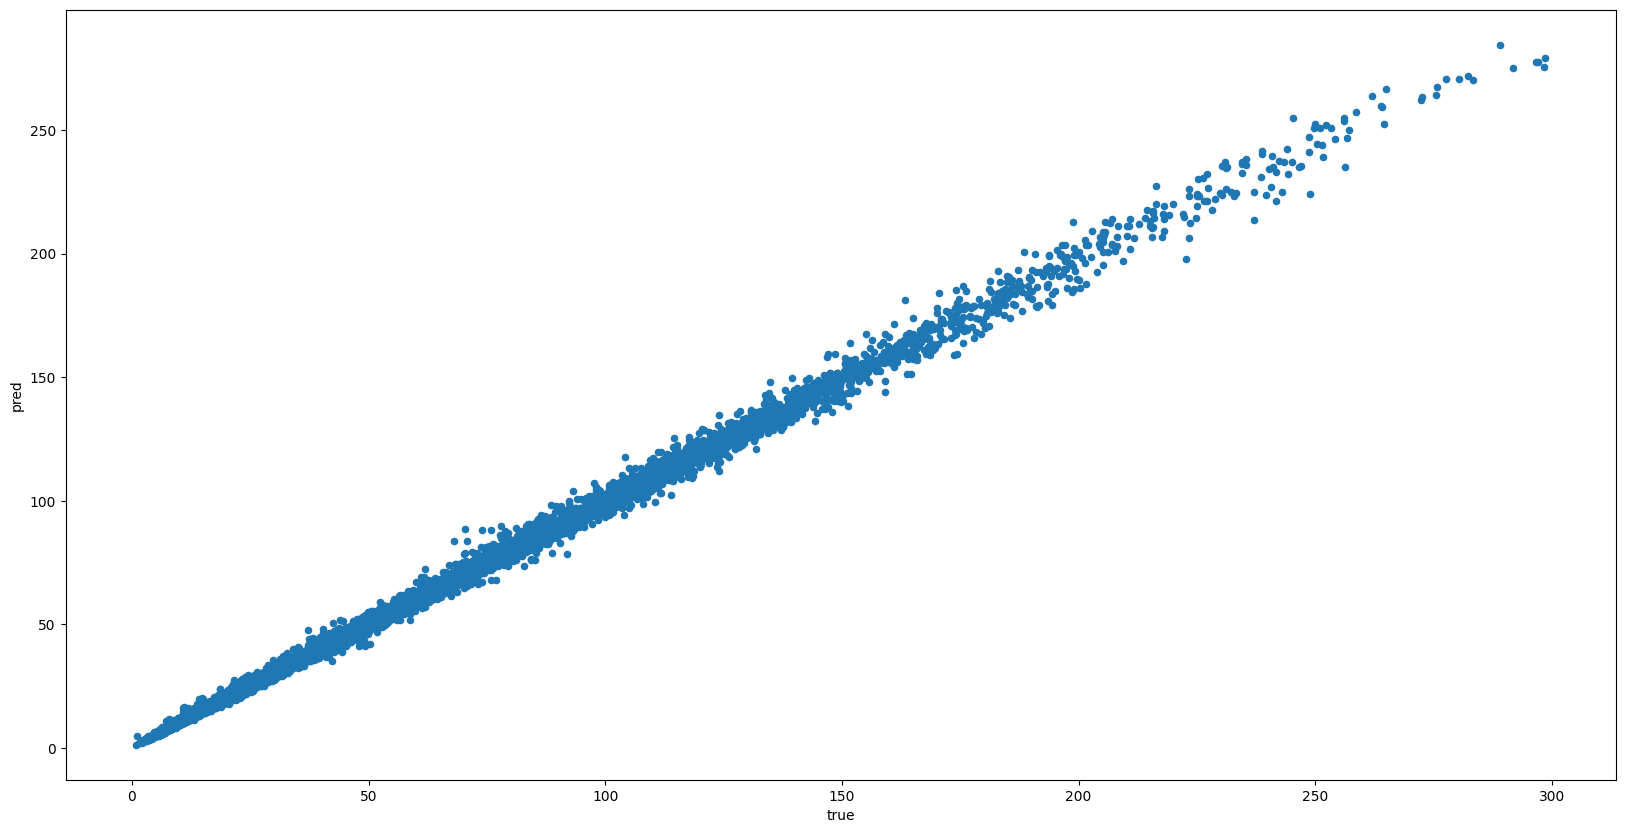

In [56]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## 5.3  XGBoost

In [69]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [70]:
# Initialize and fit XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.15
Mean Squared Error (MSE): 3.11
Root Mean Squared Error (RMSE): 1.76
R2 Score: 1.00


In [71]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)
pd.DataFrame(data)

true       pred
81410   62.673187  63.107056
71182   17.519042  17.870274
44102   18.470997  18.605070
69451   10.746345  11.709557
78508   13.276109  13.063968
...           ...        ...
16078   82.668836  85.761795
61458   31.984334  32.459232
36089   41.501976  43.924763
32044   25.905693  26.007168
40322  105.774854  99.951927

[20000 rows x 2 columns]

<AxesSubplot:xlabel='true', ylabel='pred'>

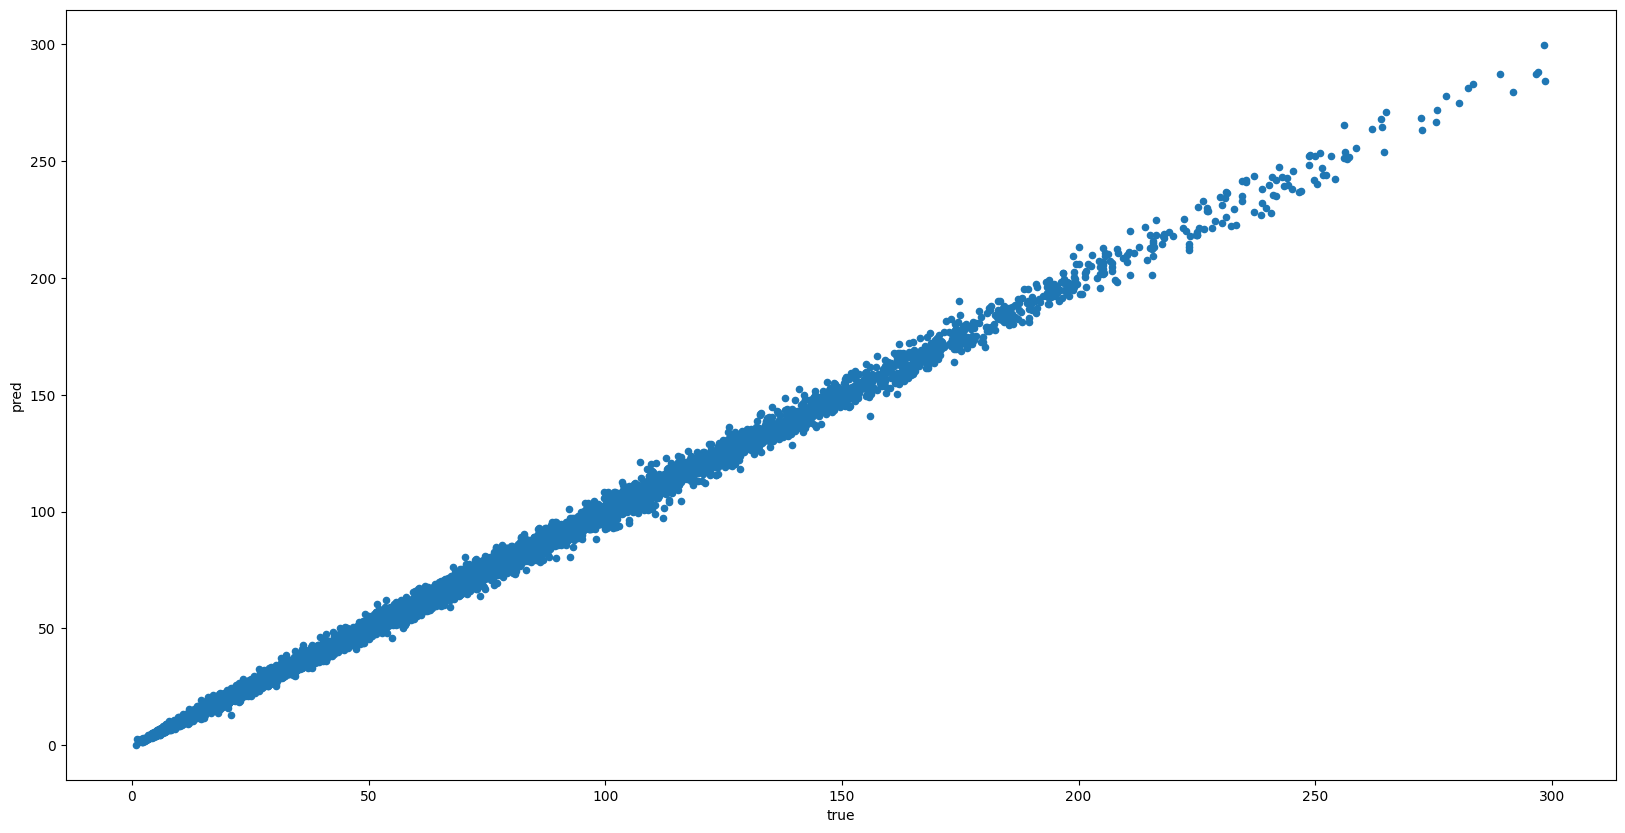

In [72]:
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## RESIDUAL

In [73]:
residuals = y_test - y_pred

c:\users\sameera\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




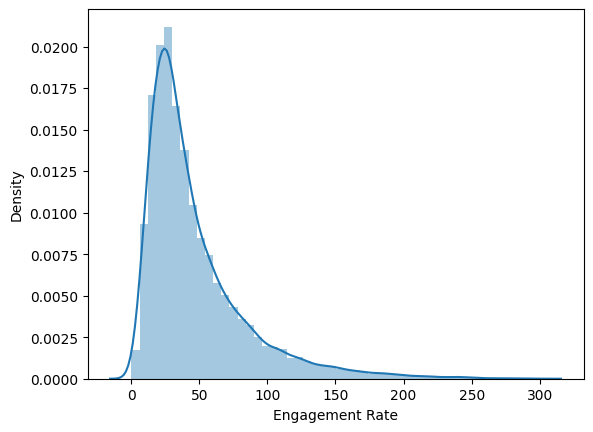

In [74]:
sns.distplot((y_test-residuals) ,bins =50);

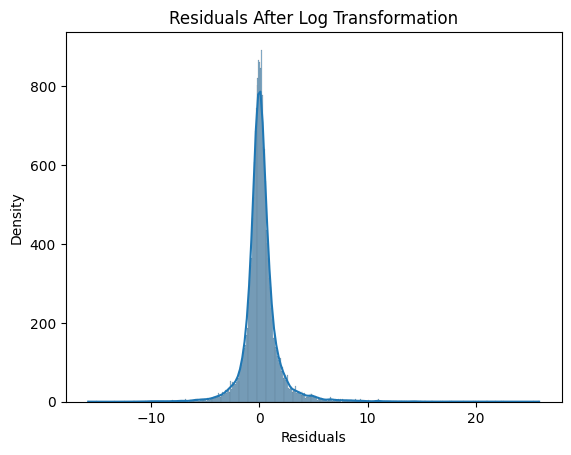

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Log transform
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Step 2: Train model
model = RandomForestRegressor()
model.fit(X_train, y_train_log)

# Step 3: Predict
y_pred_log = model.predict(X_test)

# Step 4: Inverse transform
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test_log)

# Step 5: Residuals on original scale
residuals = y_test_orig - y_pred

# Step 6: Plot
sns.histplot(residuals, kde=True)
plt.title("Residuals After Log Transformation")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

## 5.4 Polynomial Ridge Regression

In [64]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Polynomial + Ridge Regression Pipeline
ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=np.logspace(-3, 3, 10), cv=5))
])

ridge_pipeline.fit(X_train, y_train_log)

# Predictions
y_pred_log = ridge_pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test_log)

# Evaluation
mae = mean_absolute_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print(f"Polynomial Ridge MAE: {mae:.2f}")
print(f"Polynomial Ridge RMSE: {rmse:.2f}")
print(f"Polynomial Ridge R2: {r2:.2f}")


Polynomial Ridge MAE: 2.94
Polynomial Ridge RMSE: 6.09
Polynomial Ridge R2: 0.97


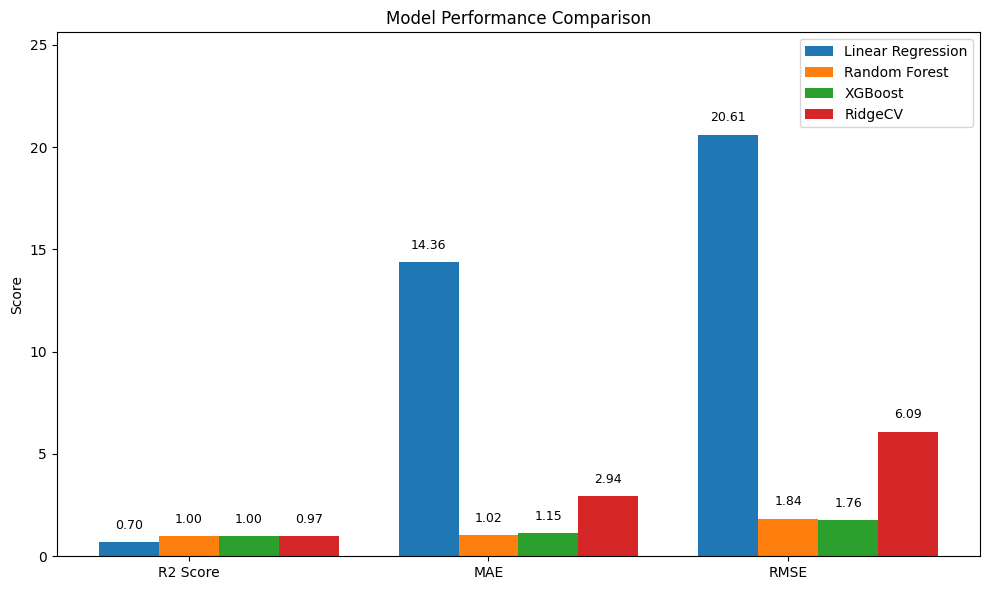

In [76]:
# Plotting a similar bar chart with model performance metrics (R2 Score, MAE, RMSE)

import numpy as np

# Metrics to plot
metrics = ["R2 Score", "MAE", "RMSE"]
models = ["Linear Regression", "Random Forest", "XGBoost", "RidgeCV"]

# Transpose data to match plot structure
metric_values = {
    "R2 Score": [0.70, 1.00, 1.00,0.97],
    "MAE": [14.36, 1.02, 1.15,2.94],
    "RMSE": [20.61, 1.84, 1.76,6.09]
}

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each model
for i, model in enumerate(models):
    values = [metric_values[m][i] for m in metrics]
    ax.bar(x + i * width, values, width, label=model)

# Add value labels
for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        value = metric_values[metric][i]
        ax.text(x[j] + i * width, value + 0.5, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

# Format plot
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.set_ylim(0, max(max(v) for v in metric_values.values()) + 5)
ax.legend()
plt.tight_layout()
plt.show()

## 7. CROSS VALIDATION

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# 5-fold cross-validation with neg RMSE (converted to positive RMSE)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train_log, cv=5, scoring='neg_root_mean_squared_error')
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train_log, cv=5, scoring='neg_root_mean_squared_error')

print(f"Random Forest CV RMSE: {abs(rf_cv_scores.mean()):.2f} ± {rf_cv_scores.std():.2f}")
print(f"XGBoost CV RMSE: {abs(xgb_cv_scores.mean()):.2f} ± {xgb_cv_scores.std():.2f}")


Random Forest CV RMSE: 0.03 ± 0.00
XGBoost CV RMSE: 0.04 ± 0.00


In [77]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Use already trained model: rando_model
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_test):
    X_val = X_test.iloc[val_index]
    y_val = y_test.iloc[val_index]
    
    # Predict using the trained model (do not retrain here)
    y_pred = rando_model.predict(X_val)
    
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Report mean ± std of scores
print(f"Test CV RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Test CV MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"Test CV R2: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")


Test CV RMSE: 1.80 ± 0.07
Test CV MAE: 1.01 ± 0.02
Test CV R2: 1.00 ± 0.00
